In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Wgranie plików w jednym miejscu

In [2]:
import numpy as np
path = '/content/drive/MyDrive/Torso/Acc_x.txt'
acc_x = np.loadtxt(path)
acc_y = np.loadtxt('/content/drive/MyDrive/Torso/Acc_y.txt')
acc_z = np.loadtxt('/content/drive/MyDrive/Torso/Acc_z.txt')
gyr_x = np.loadtxt('/content/drive/MyDrive/Torso/Gyr_x.txt')
gyr_y = np.loadtxt('/content/drive/MyDrive/Torso/Gyr_y.txt')
gyr_z = np.loadtxt('/content/drive/MyDrive/Torso/Gyr_z.txt')
mag_x = np.loadtxt('/content/drive/MyDrive/Torso/Mag_x.txt')
mag_y = np.loadtxt('/content/drive/MyDrive/Torso/Mag_y.txt')
mag_z = np.loadtxt('/content/drive/MyDrive/Torso/Mag_z.txt')

In [3]:
labels = np.loadtxt('/content/drive/MyDrive/Torso/Label.txt', dtype=int)

In [ ]:
gyr = np.stack([gyr_x, gyr_y, gyr_z], axis=1)
mag = np.stack([mag_x, mag_y, mag_z], axis=1)
acc = np.stack([acc_x, acc_y, acc_z], axis=1)

In [4]:
labels_flat = labels[:, 250]  # shape: (196072,)

#Analiza danych dla TORSO

# AKCELEROMETR

W tej sekcji analizujemy dane z czujnika Torso (akcelerometr)

Najpierw sprawdzenie liczebności klas, potem przebiegi surowe,
ich średnie i odchylenia standardowe jak i ich przekształcenia (FFT, magnitude).

In [18]:
import numpy as np
path = '/content/drive/MyDrive/Torso/Acc_x.txt'
acc_x = np.loadtxt(path)
acc_y = np.loadtxt('/content/drive/MyDrive/Torso/Acc_y.txt')
acc_z = np.loadtxt('/content/drive/MyDrive/Torso/Acc_z.txt')


In [2]:
print(acc_x.shape, acc_y.shape, acc_z.shape)  # (196072, 500) każda


(196072, 500) (196072, 500) (196072, 500)


In [19]:
# shape każdego: (196072, 500)
# scalanie w (196072, 3, 500)
acc = np.stack([acc_x, acc_y, acc_z], axis=1)  # shape: (N, C, T)

In [4]:
labels = np.loadtxt('/content/drive/MyDrive/Torso/Label.txt', dtype=int)
print(labels.shape)  # (196072, 500)

(196072, 500)


In [20]:
labels_flat = labels[:, 250]  # shape: (196072,)

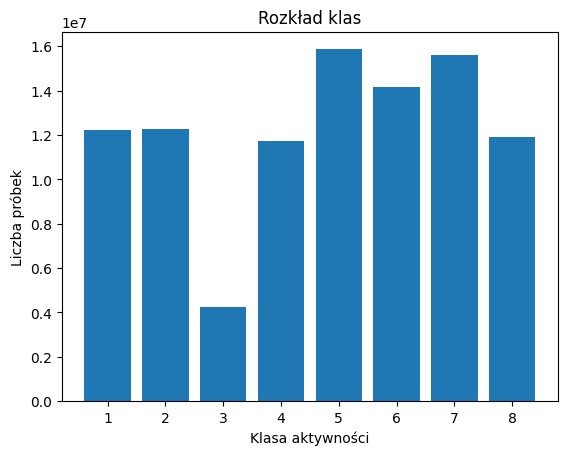

In [6]:
import matplotlib.pyplot as plt
classes, counts = np.unique(labels, return_counts=True)
plt.bar(classes, counts)
plt.xticks(classes)
plt.xlabel("Klasa aktywności")
plt.ylabel("Liczba próbek")
plt.title("Rozkład klas")
plt.show()


In [8]:
activity_names = {
1: 'Still (stanie/siedzenie)',
2: 'Walk (chodzenie)',
3: 'Run (bieganie)',
4: 'Bike (rower)',
5: 'Car (samochód)',
6: 'Bus (autobus)',
7: 'Train (pociąg)',
8: 'Subway (metro)',
}

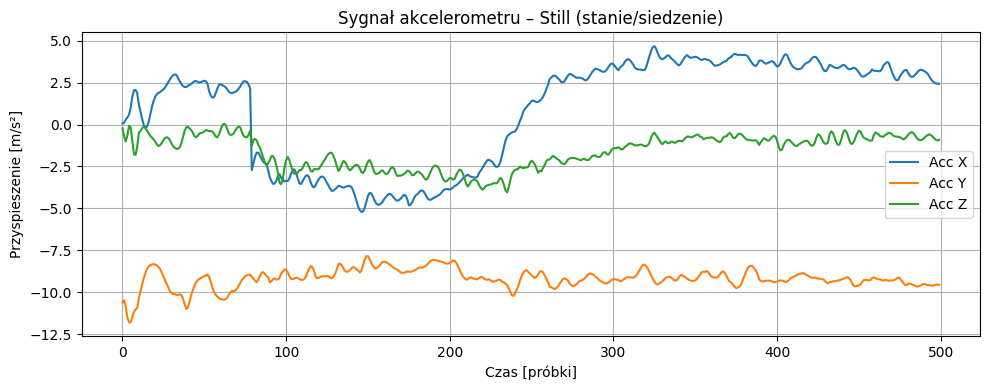

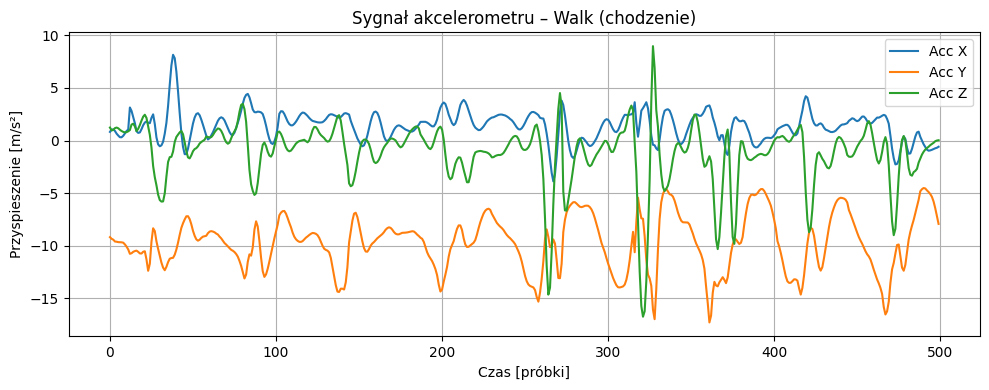

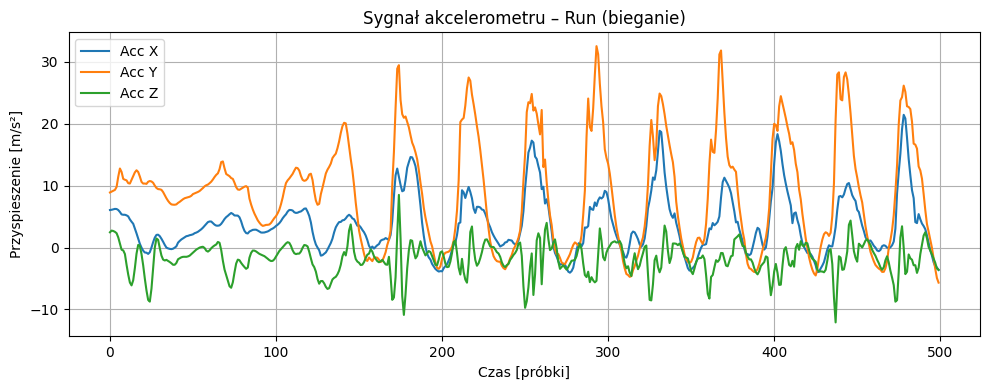

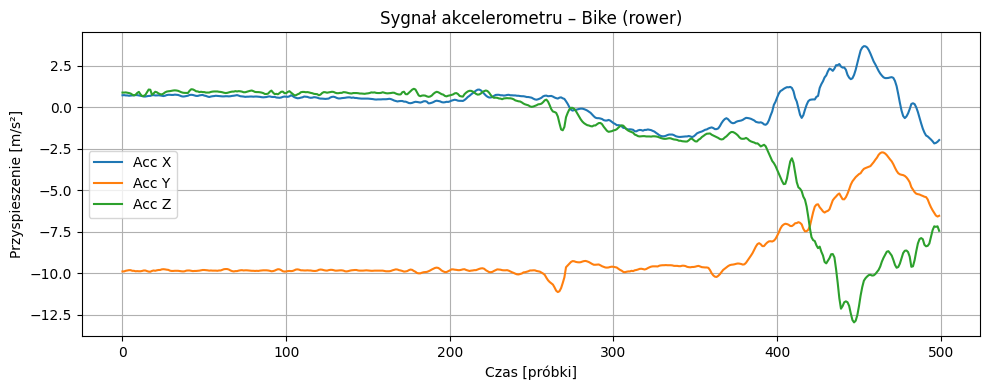

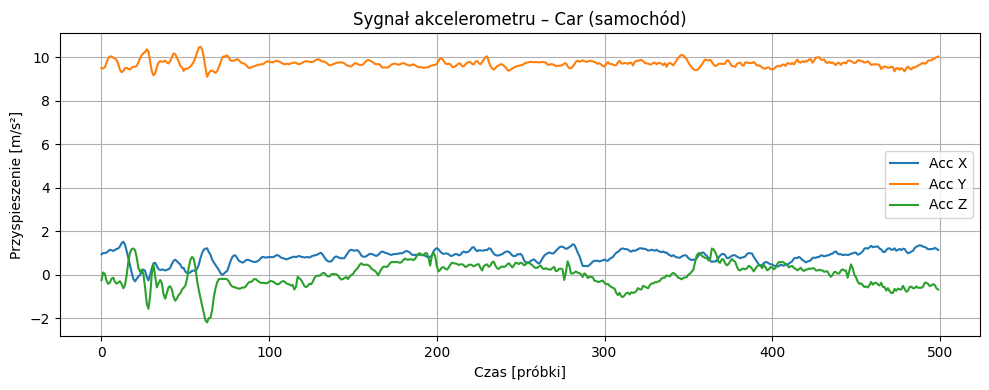

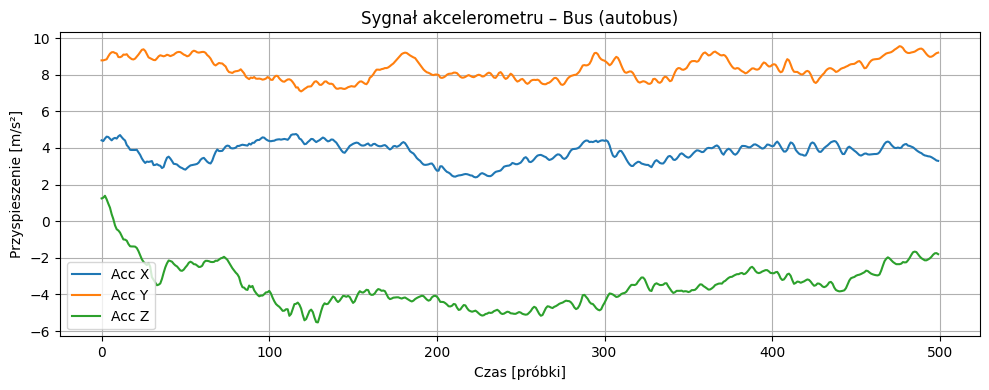

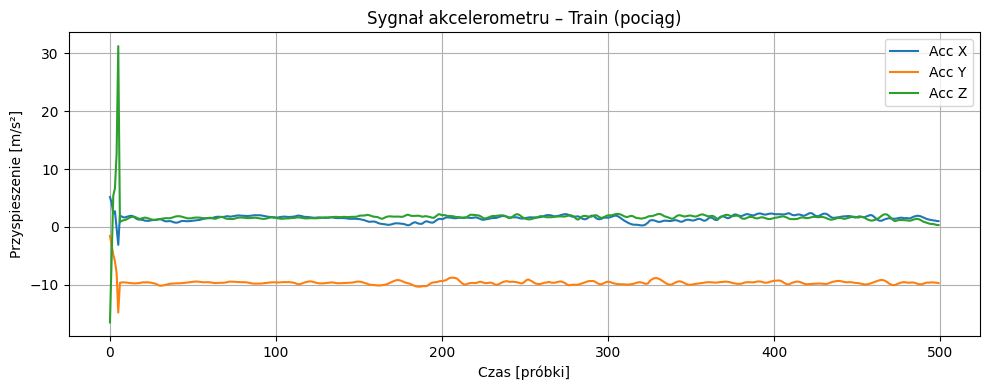

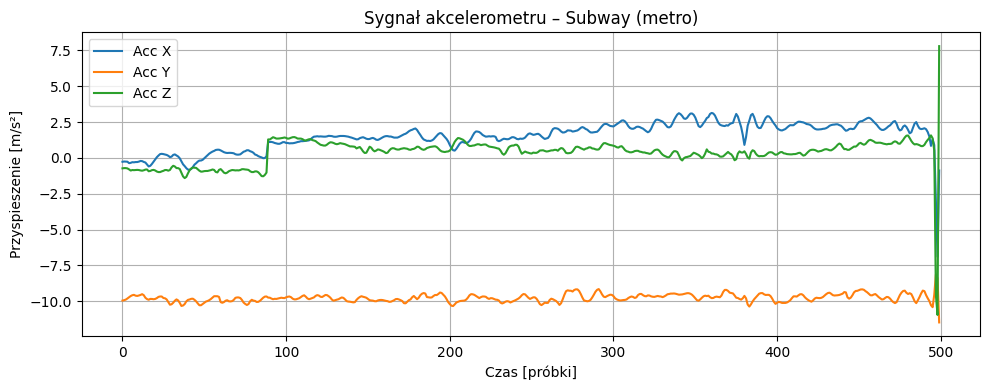

In [9]:
unique_labels = np.unique(labels_flat)

for class_label in sorted(unique_labels):
    indices = np.where(labels_flat == class_label)[0]
    if len(indices) == 0:
        continue

    idx = indices[0]  # pierwszy przykład tej klasy
    sample = acc[idx]  # shape: (3, 500)

    plt.figure(figsize=(10, 4))
    plt.plot(sample[0], label='Acc X')
    plt.plot(sample[1], label='Acc Y')
    plt.plot(sample[2], label='Acc Z')
    plt.title(f'Sygnał akcelerometru – {activity_names.get(class_label)}')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Przyspieszenie [m/s²]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

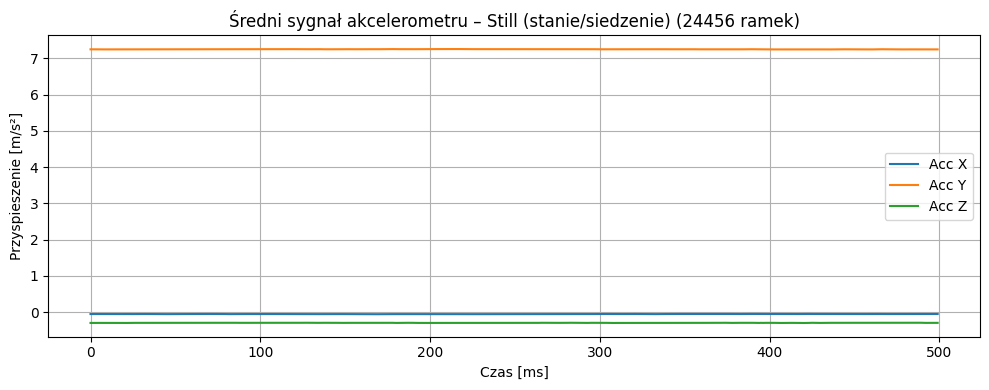

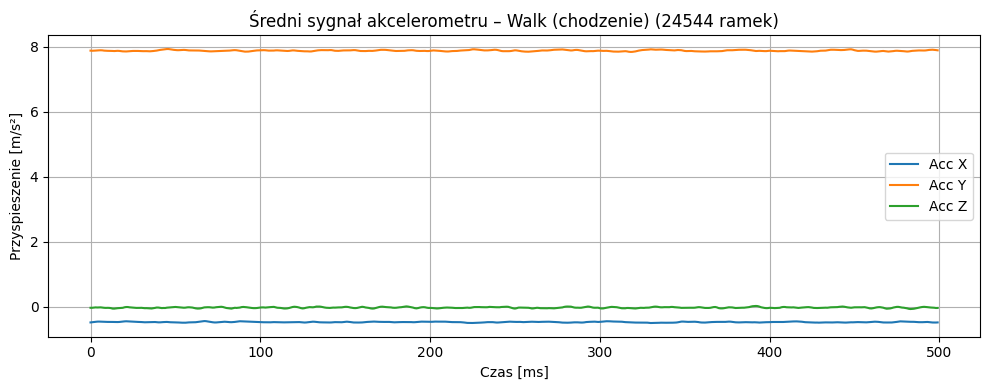

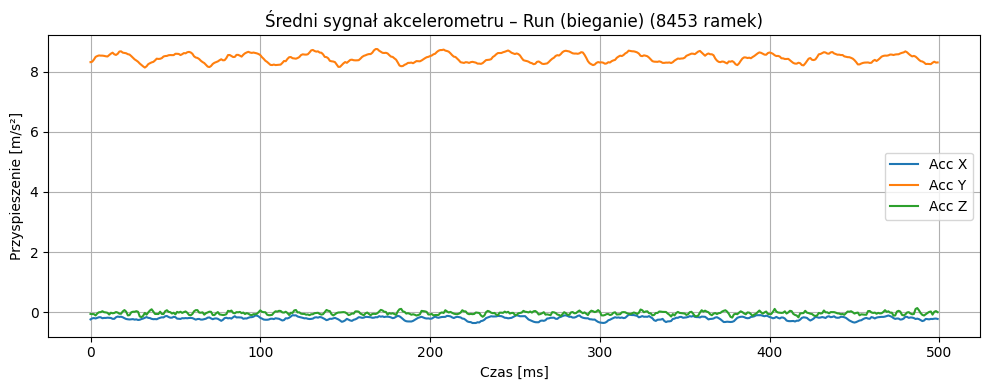

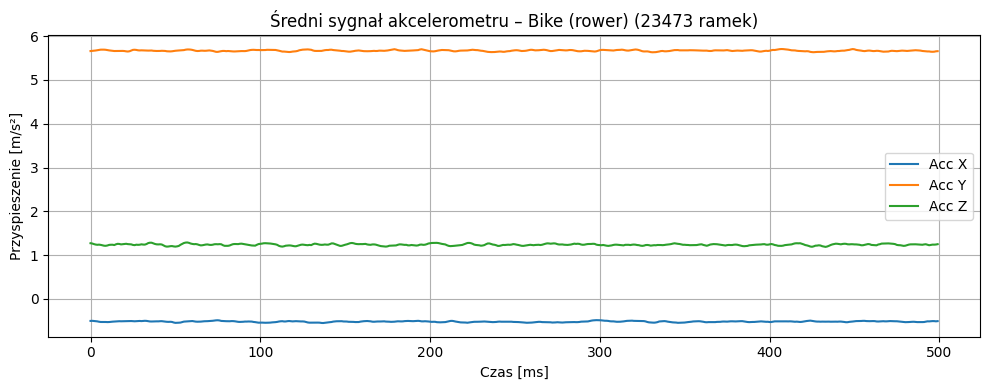

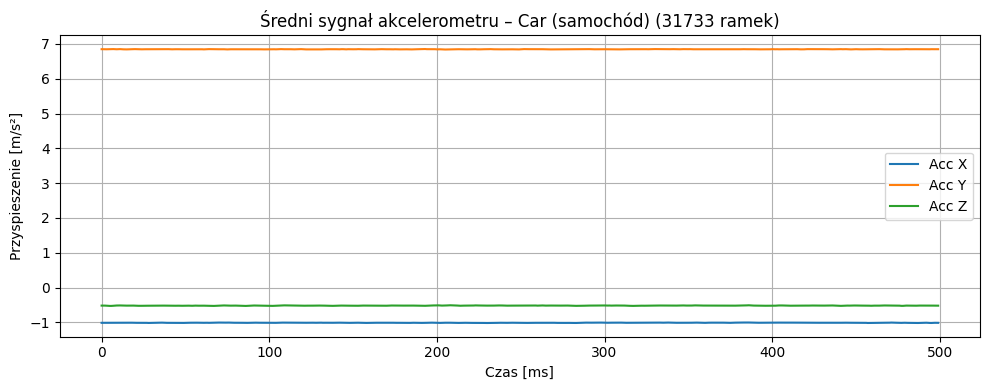

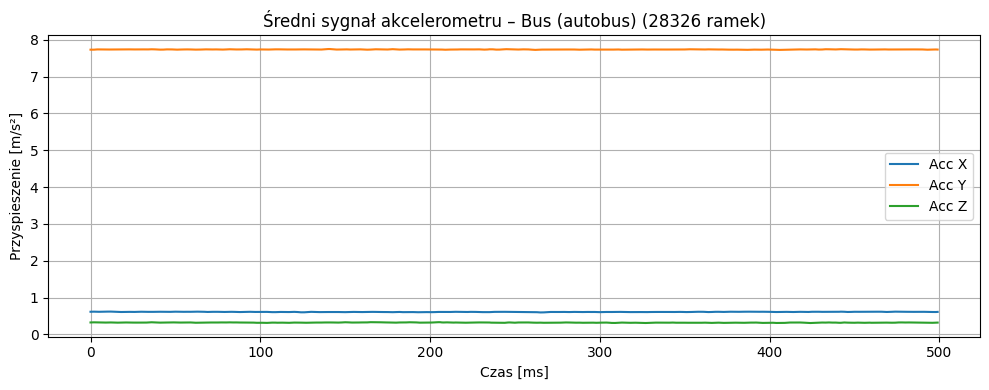

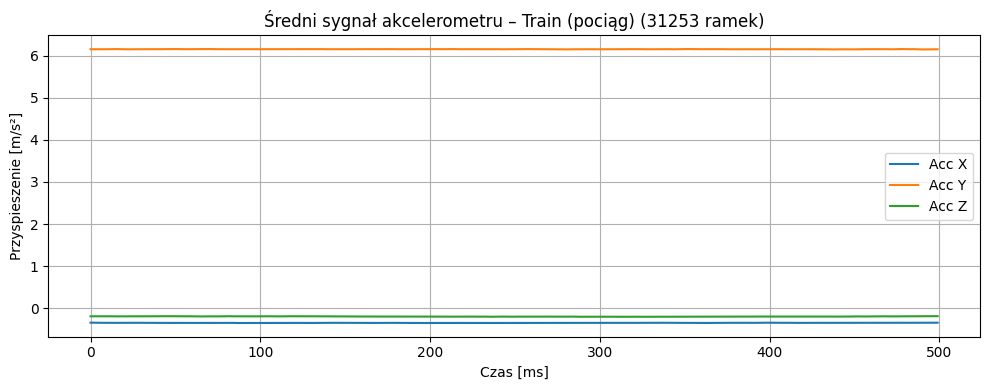

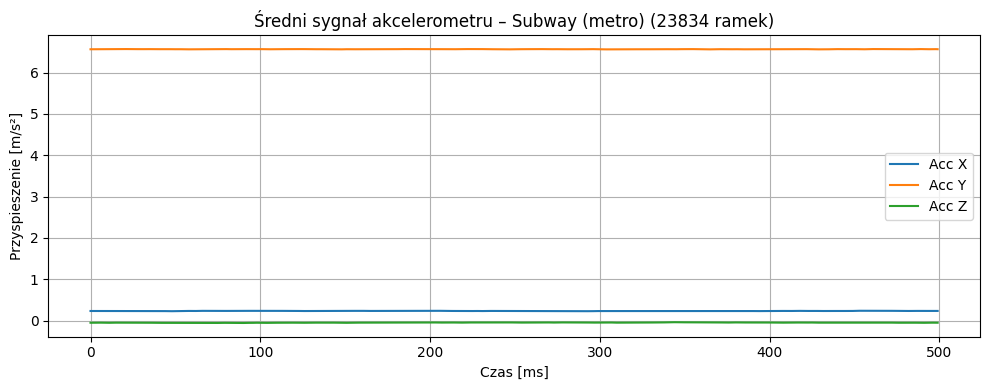

In [10]:
def plot_mean_acc_all(acc, labels_flat):
    unique_classes = np.unique(labels_flat)

    for class_id in unique_classes:
        idxs = np.where(labels_flat == class_id)[0]
        if len(idxs) == 0:
            print(f"Brak ramek dla klasy {class_id}")
            continue

        class_data = acc[idxs].astype(np.float32)  # shape: (N, 3, 500)
        mean_signal = np.mean(class_data, axis=0)  # shape: (3, 500)

        plt.figure(figsize=(10, 4))
        plt.plot(mean_signal[0], label='Acc X')
        plt.plot(mean_signal[1], label='Acc Y')
        plt.plot(mean_signal[2], label='Acc Z')
        plt.title(f'Średni sygnał akcelerometru – {activity_names.get(class_id)} ({len(idxs)} ramek)')
        plt.xlabel('Czas [ms]')
        plt.ylabel('Przyspieszenie [m/s²]')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.close()

plot_mean_acc_all(acc, labels_flat)

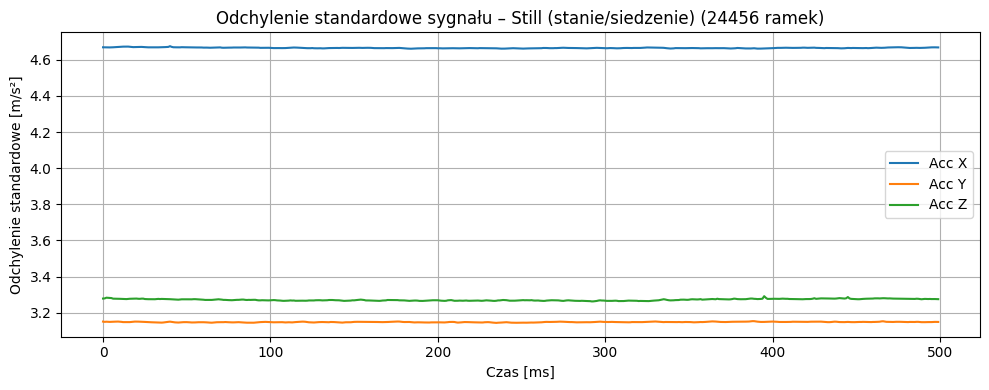

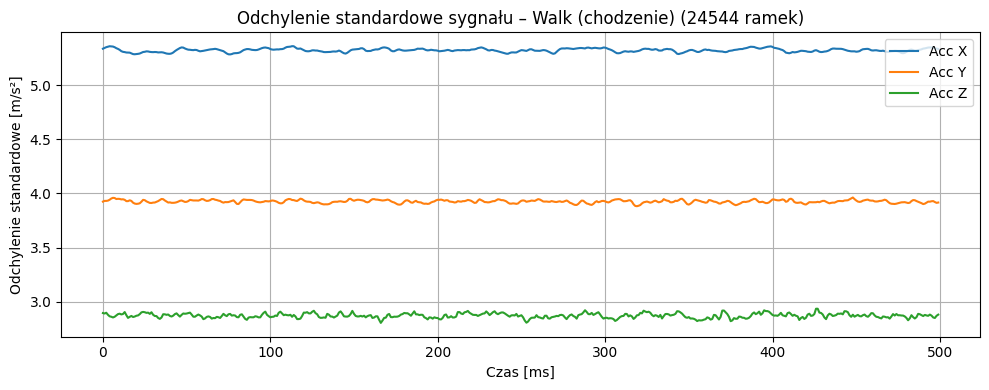

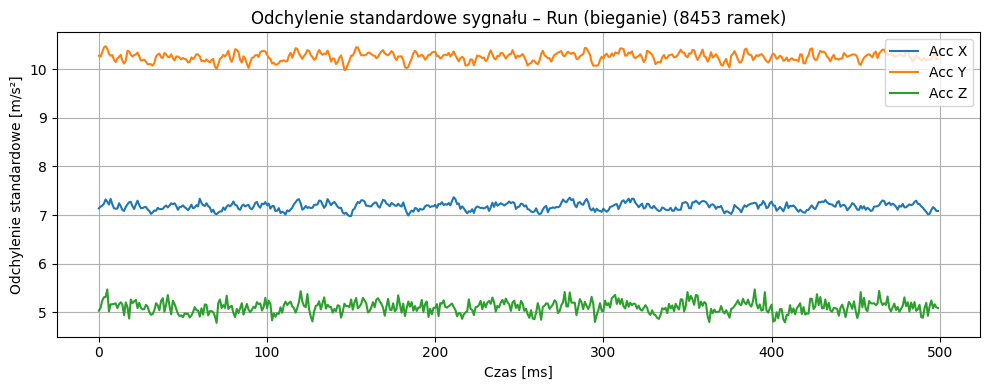

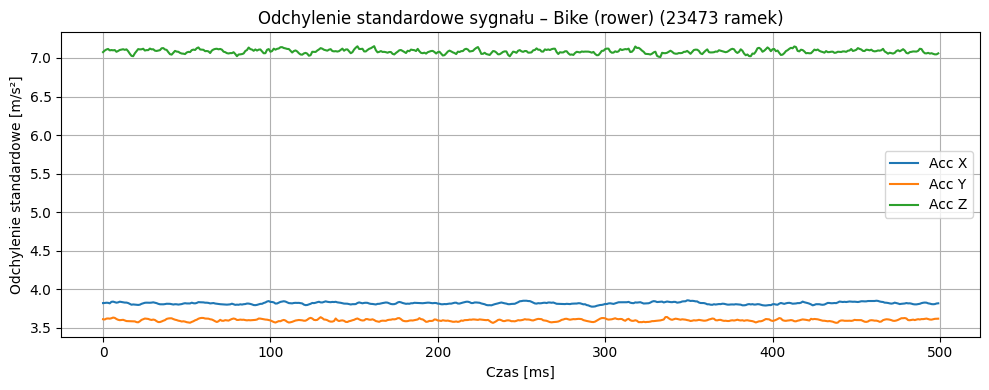

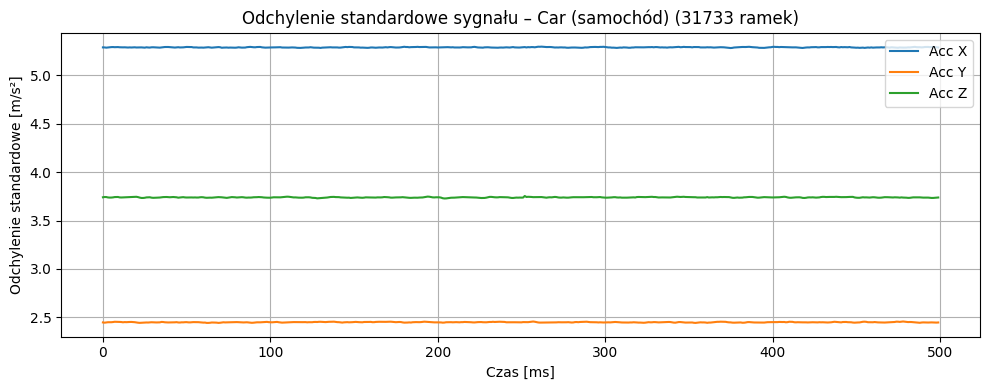

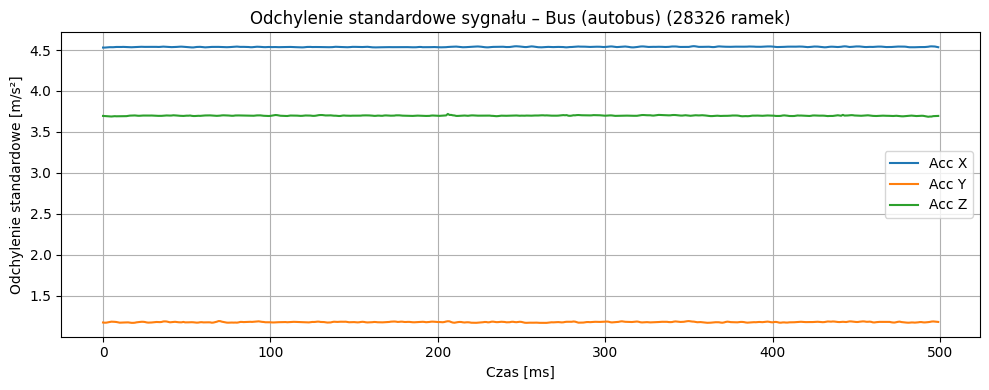

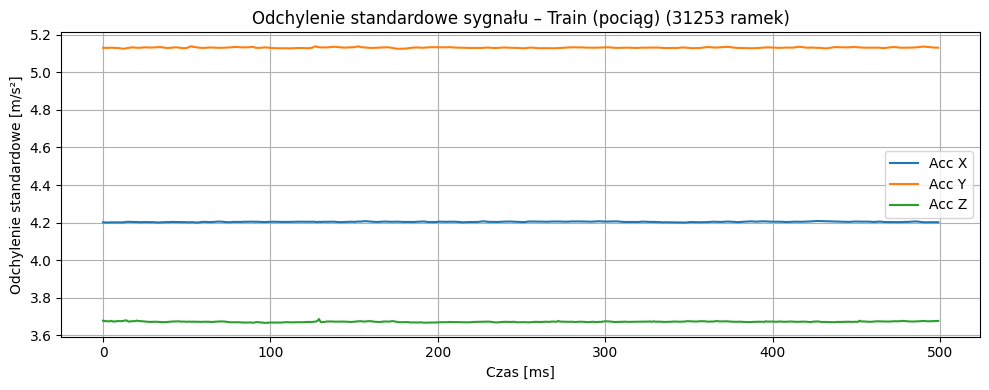

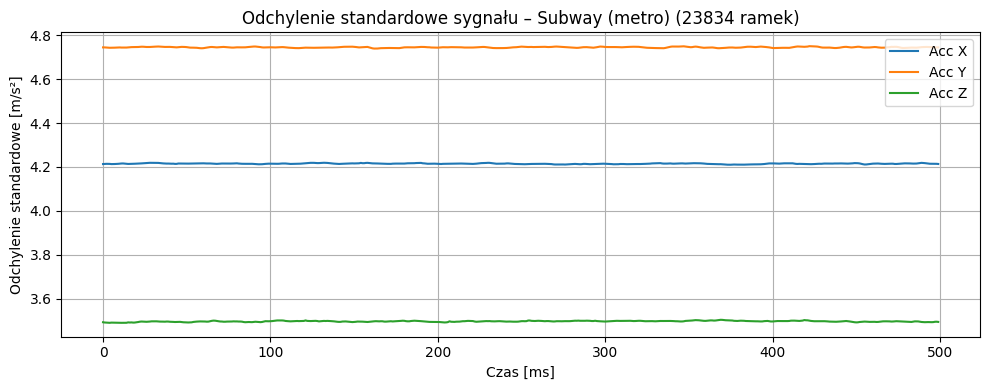

In [11]:
import numpy as np
import matplotlib.pyplot as plt

for class_id in sorted(np.unique(labels_flat)):
    idxs = np.where(labels_flat == class_id)[0]
    if len(idxs) == 0:
        continue

    class_data = acc[idxs]  # shape: (n_samples_class, 3, 500)
    std_signal = np.std(class_data, axis=0)  # shape: (3, 500)

    plt.figure(figsize=(10, 4))
    plt.plot(std_signal[0], label='Acc X')
    plt.plot(std_signal[1], label='Acc Y')
    plt.plot(std_signal[2], label='Acc Z')
    plt.title(f'Odchylenie standardowe sygnału – {activity_names.get(class_id)} ({len(idxs)} ramek)')
    plt.xlabel('Czas [ms]')
    plt.ylabel('Odchylenie standardowe [m/s²]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


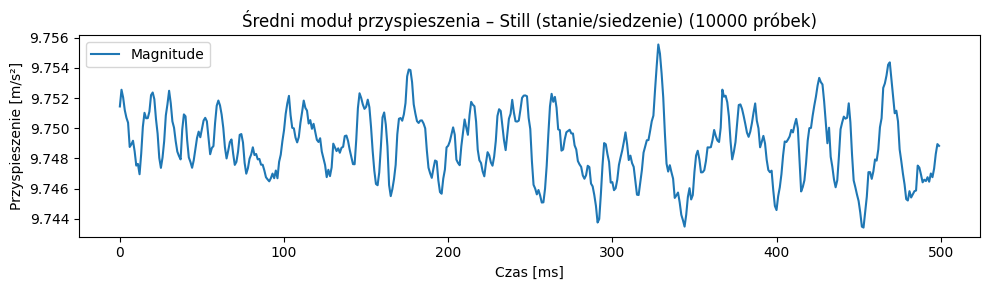

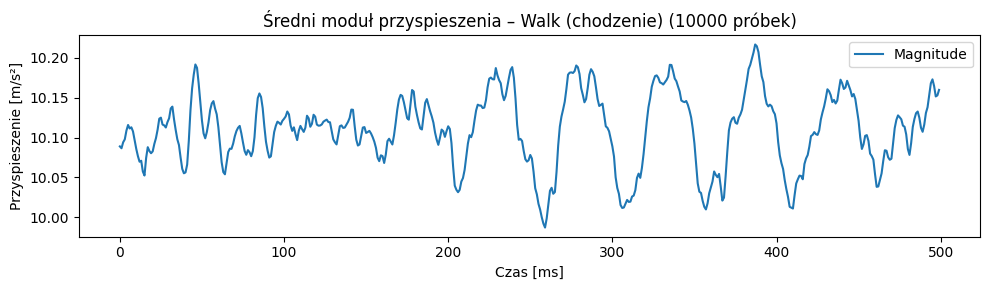

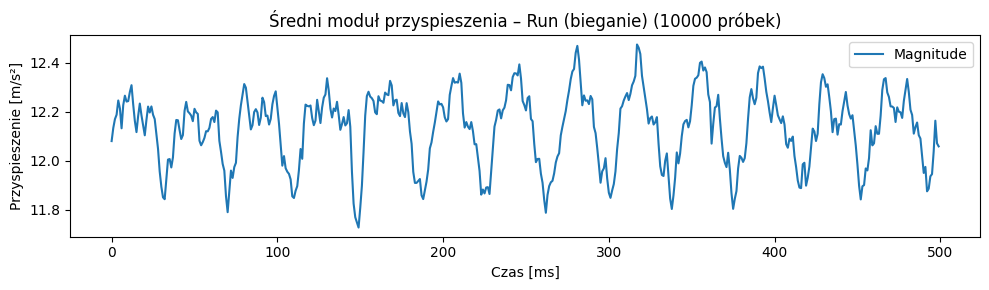

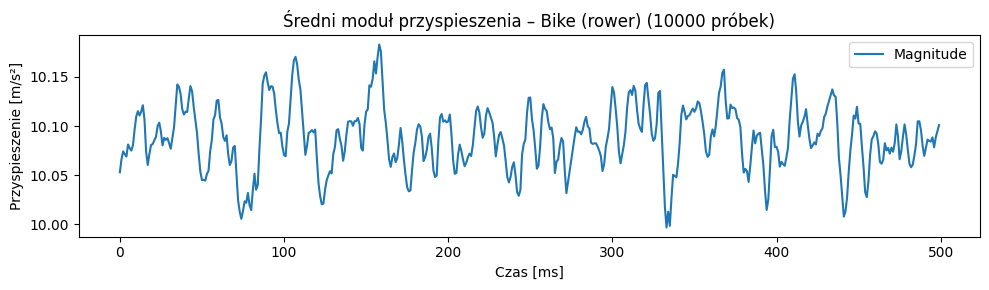

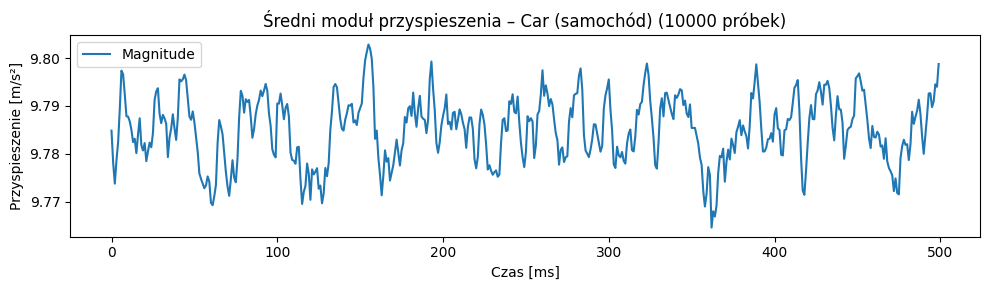

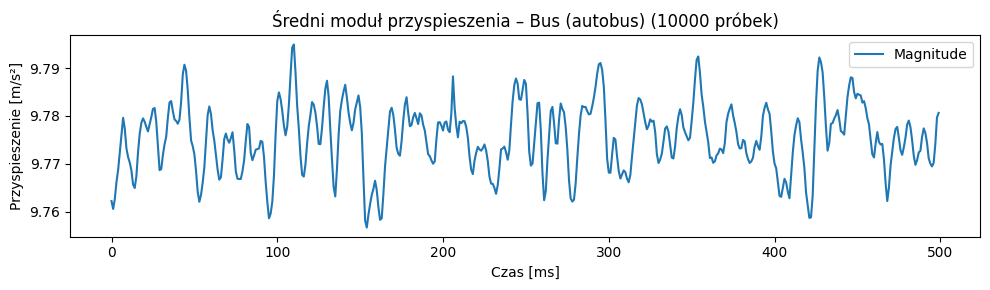

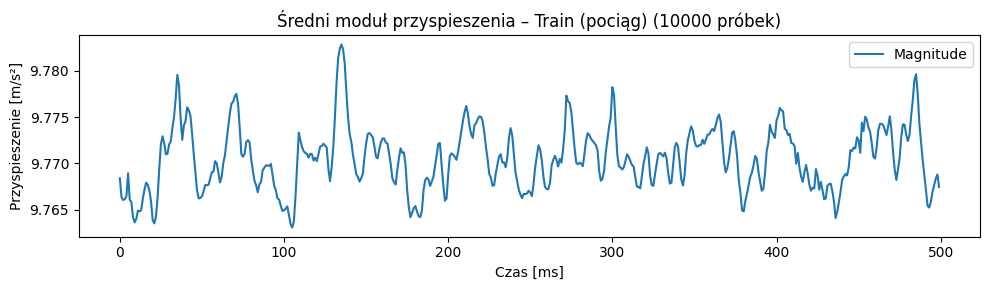

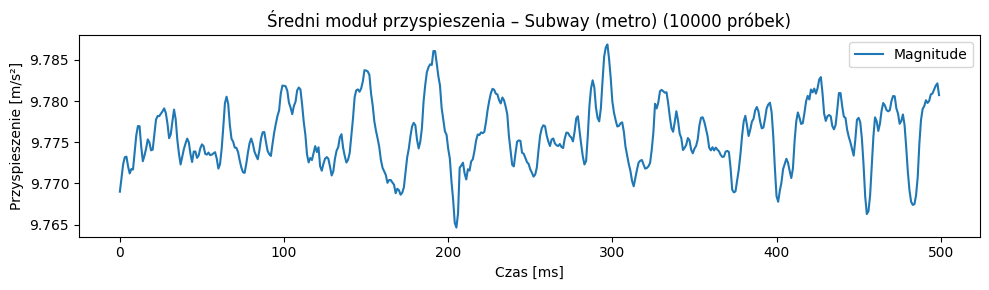

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def plot_mean_magnitude_per_class(acc_x, acc_y, acc_z, labels, max_frames=10000):
    magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)  # shape: (n_samples, 500)

    for class_id in np.unique(labels):
        idxs = np.where(labels == class_id)[0]
        if len(idxs) == 0:
            continue
        if len(idxs) > max_frames:
            idxs = np.random.choice(idxs, size=max_frames, replace=False)

        mean_mag = np.mean(magnitude[idxs], axis=0)

        plt.figure(figsize=(10, 3))
        plt.plot(mean_mag, label='Magnitude')
        plt.title(f'Średni moduł przyspieszenia – {activity_names.get(class_id, f"Klasa {class_id}")} ({len(idxs)} próbek)')
        plt.xlabel('Czas [ms]')
        plt.ylabel('Przyspieszenie [m/s²]')
        plt.legend()
        plt.tight_layout()
        plt.show()

# uruchomienie
plot_mean_magnitude_per_class(acc_x, acc_y, acc_z, labels, max_frames=10000)


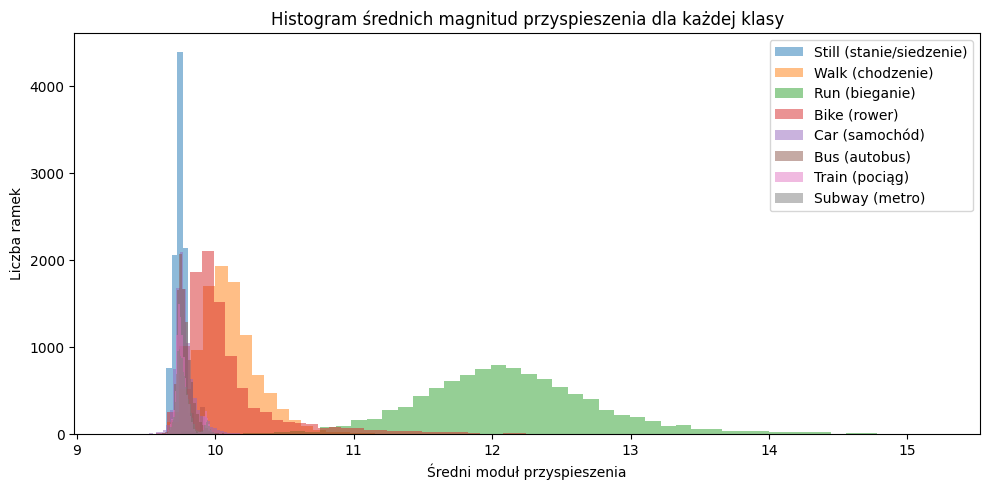

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Oblicz moduł przyspieszenia
magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)  # shape: (n_samples, 500)

mean_mags = []
mean_labels = []

max_frames_per_class = 10000  # aby nie przeładować pamięci

for class_id in np.unique(labels):
    idxs = np.where(labels == class_id)[0]

    if len(idxs) == 0:
        continue

    if len(idxs) > max_frames_per_class:
        idxs = np.random.choice(idxs, size=max_frames_per_class, replace=False)

    mean_class = magnitude[idxs].mean(axis=1)  # średnia po czasie (oś 1)
    mean_mags.extend(mean_class)
    mean_labels.extend([class_id] * len(mean_class))

mean_mags = np.array(mean_mags)
mean_labels = np.array(mean_labels)

plt.figure(figsize=(10, 5))
for class_id in np.unique(mean_labels):
    values = mean_mags[mean_labels == class_id]
    plt.hist(values, bins=50, alpha=0.5, label=activity_names.get(class_id, f"Klasa {class_id}"))

plt.xlabel('Średni moduł przyspieszenia')
plt.ylabel('Liczba ramek')
plt.title('Histogram średnich magnitud przyspieszenia dla każdej klasy')
plt.legend()
plt.tight_layout()
plt.show()


dodatkow fft

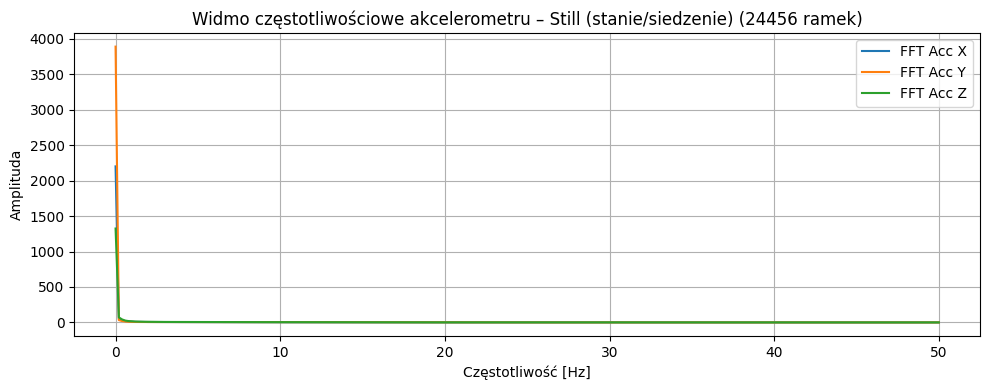

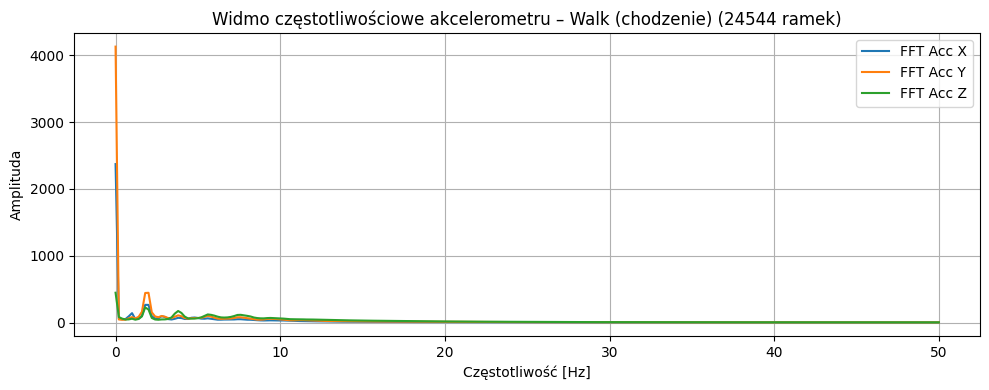

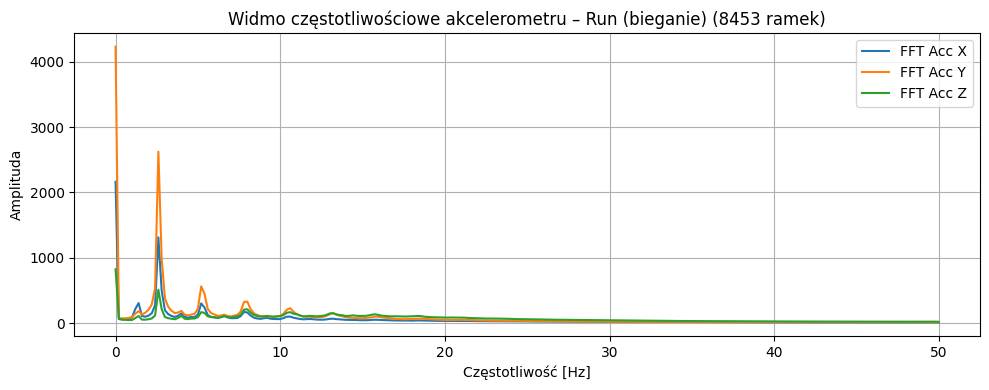

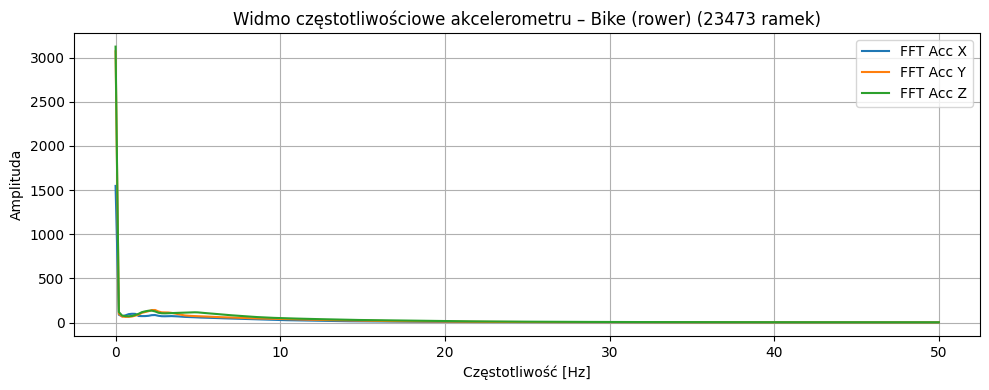

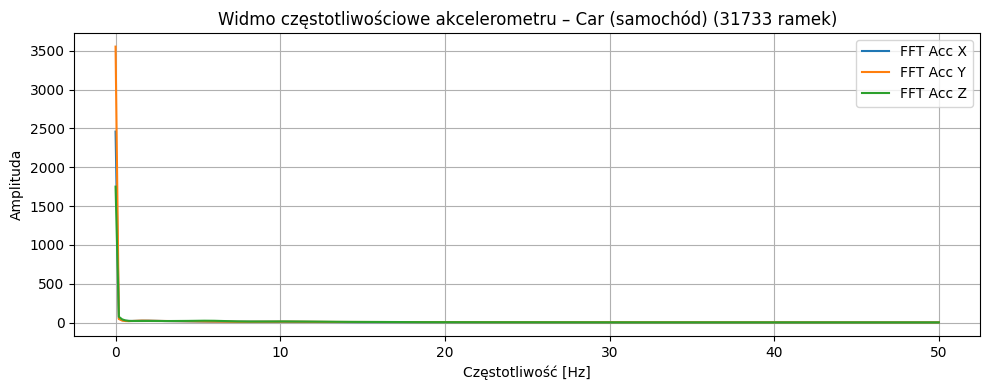

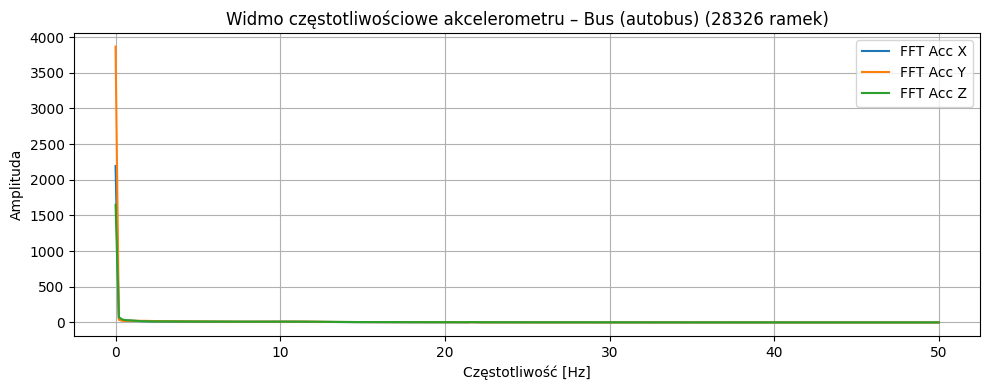

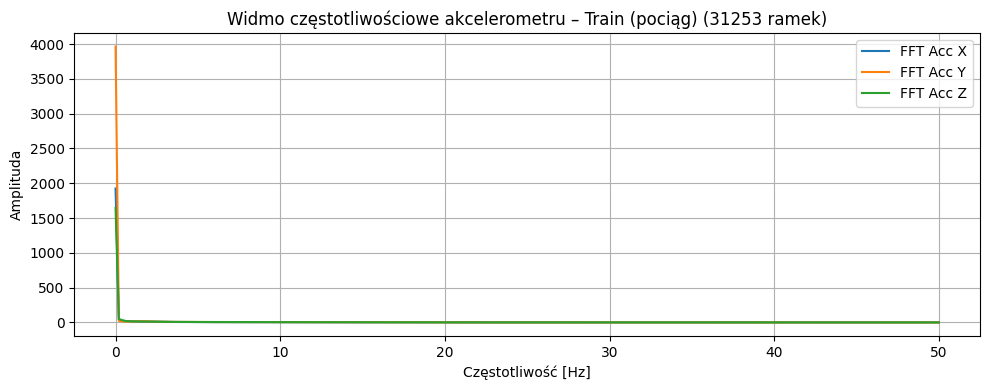

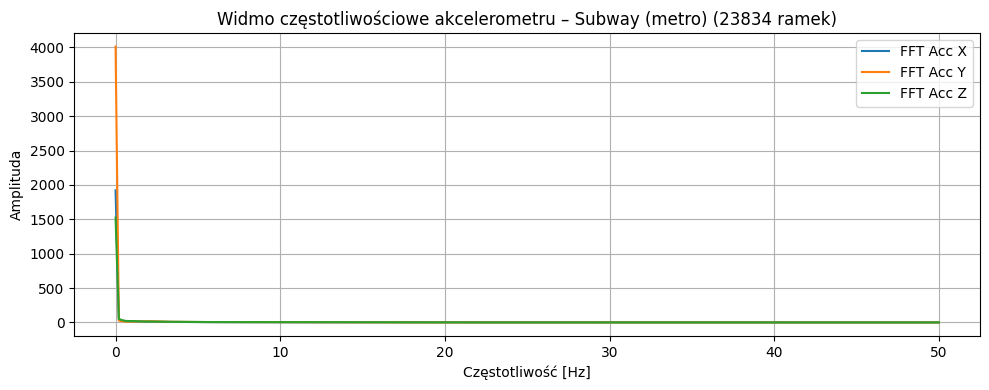

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq


sampling_rate = 100  # Hz
N = acc.shape[2]     # liczba próbek czasowych (czyli 500)
freqs = rfftfreq(N, d=1 / sampling_rate)

for class_id in sorted(np.unique(labels_flat)):
    idxs = np.where(labels_flat == class_id)[0]
    if len(idxs) == 0:
        continue

    class_samples = acc[idxs]  # shape: (n_samples_class, 3, 500)
    fft_magnitudes = []

    for sample in class_samples:
        axis_ffts = []
        for axis_signal in sample:  # 3 razy: X, Y, Z
            fft_vals = np.abs(rfft(axis_signal))
            axis_ffts.append(fft_vals)
        fft_magnitudes.append(axis_ffts)

    fft_magnitudes = np.array(fft_magnitudes)  # shape: (n_samples, 3, freq_bins)
    mean_fft = np.mean(fft_magnitudes, axis=0)  # shape: (3, freq_bins)

    # Wykres
    plt.figure(figsize=(10, 4))
    axes = ['X', 'Y', 'Z']
    for i in range(3):
        plt.plot(freqs, mean_fft[i], label=f'FFT Acc {axes[i]}')

    plt.title(f'Widmo częstotliwościowe akcelerometru – {activity_names.get(class_id)} ({len(idxs)} ramek)')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


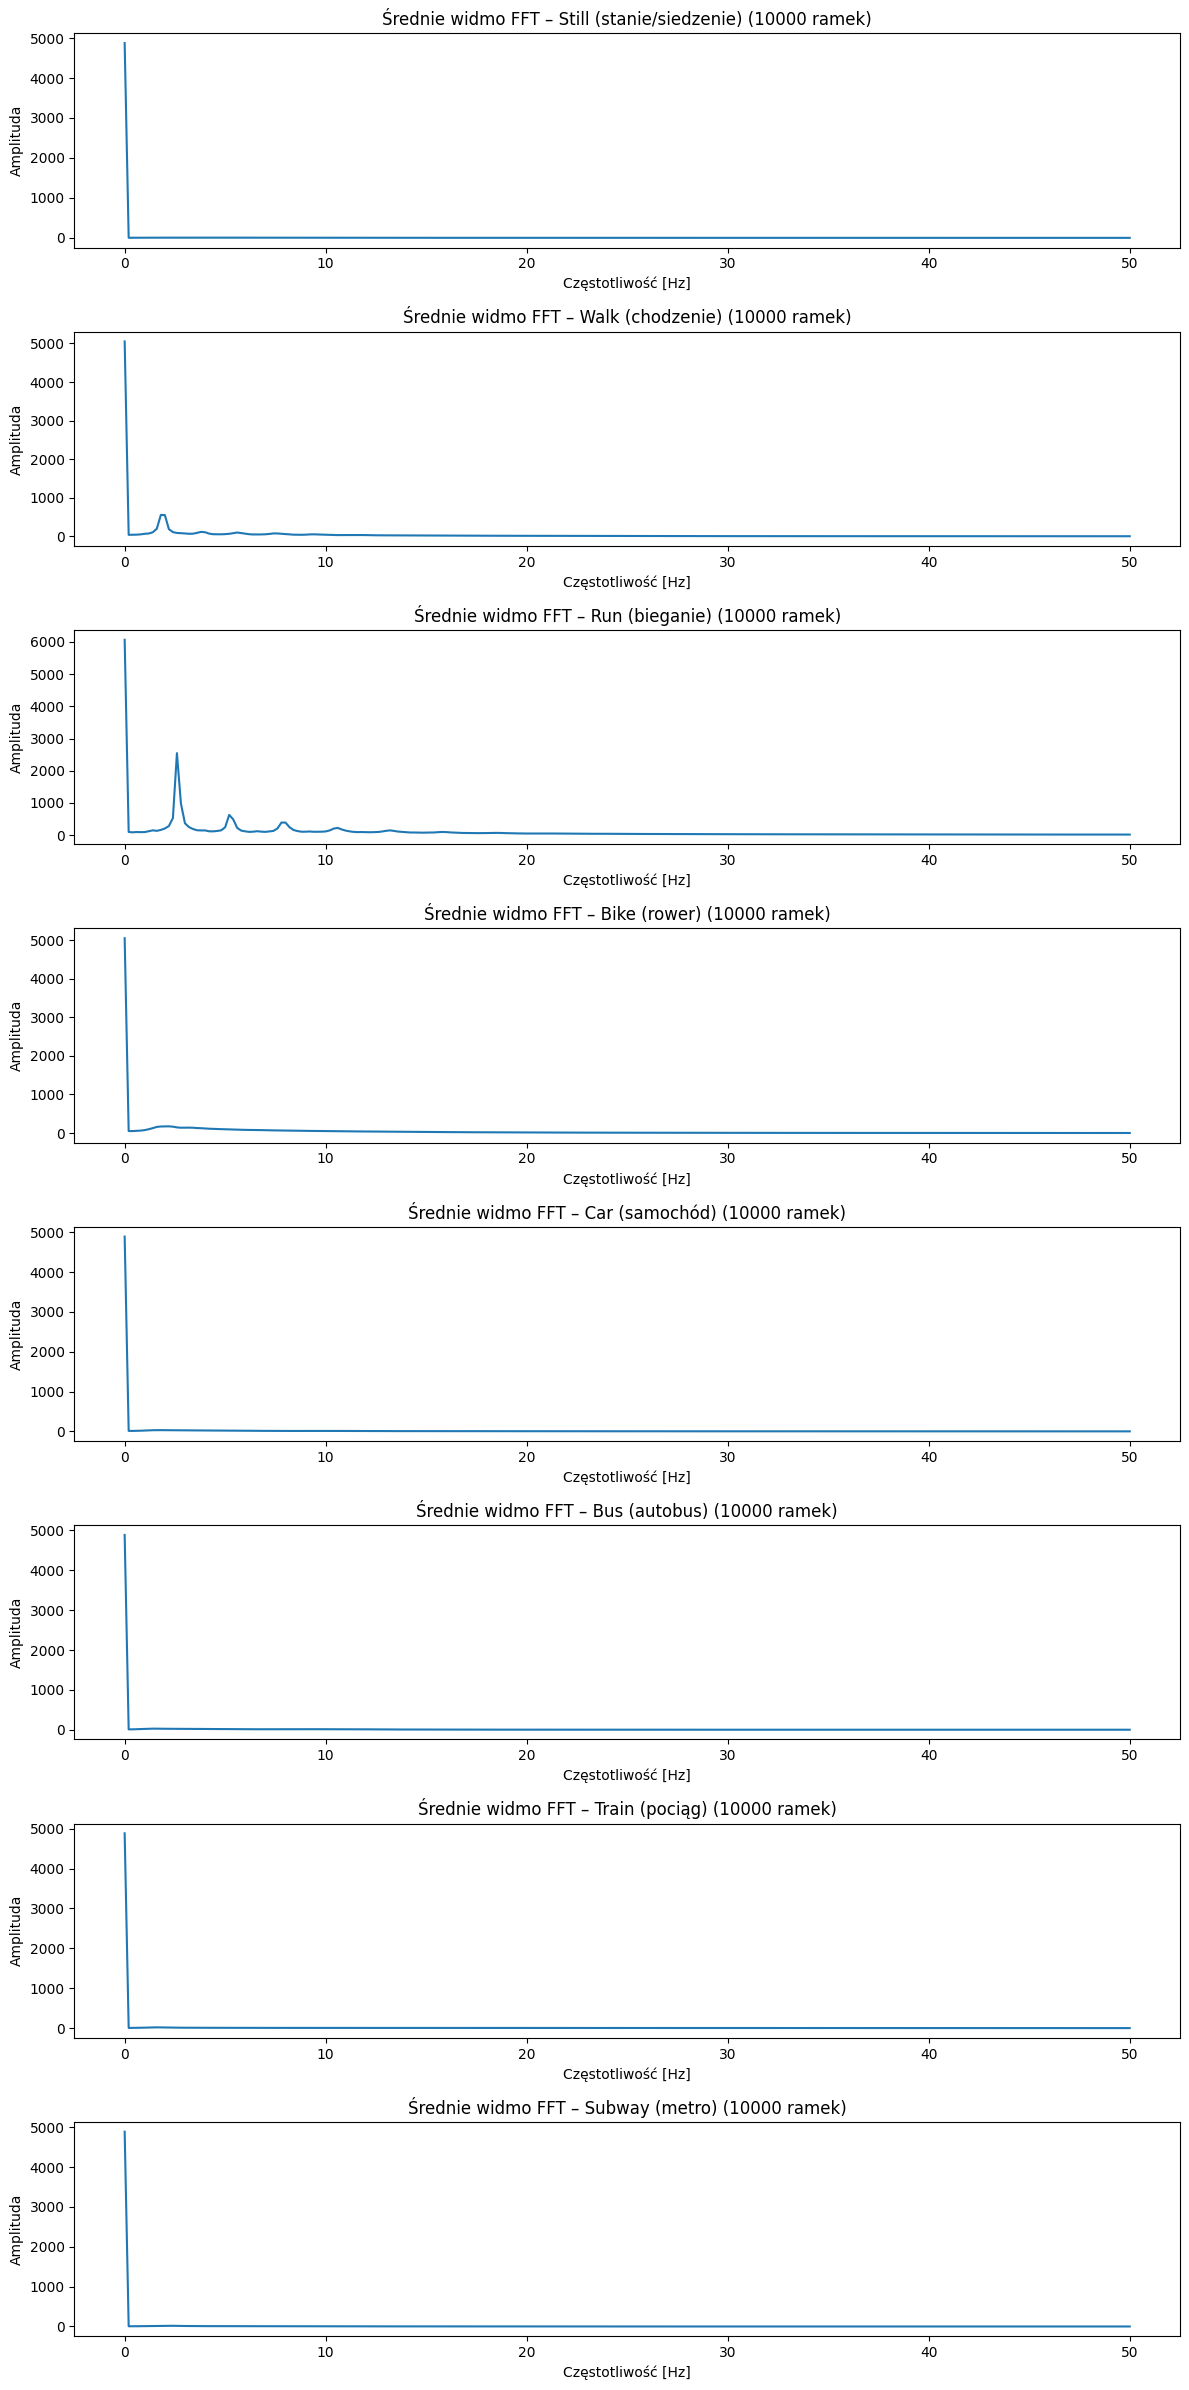

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#magnituda (moduł przyspieszenia): shape (N, 500)
acc_magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)

#parametry FFT
sampling_rate = 100  # Hz
n_samples = acc_magnitude.shape[1]
freqs = np.fft.rfftfreq(n_samples, d=1/sampling_rate)

plt.figure(figsize=(12, 24))

for i, class_id in enumerate(activity_names.keys(), 1):
    all_idxs = np.where(labels == class_id)[0]

    # ograniczenie do 10000 ramek
    if len(all_idxs) > 10000:
        idxs = np.random.choice(all_idxs, size=10000, replace=False)
    else:
        idxs = all_idxs

    #FFT dla każdej ramki osobno
    fft_values = np.abs(np.fft.rfft(acc_magnitude[idxs], axis=1))  # shape: (n, freq)
    mean_fft = np.mean(fft_values, axis=0)

    plt.subplot(8, 1, i)
    plt.plot(freqs, mean_fft)
    plt.title(f'Średnie widmo FFT – {activity_names[class_id]} ({len(idxs)} ramek)')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def compute_pca_projection(acc_x, acc_y, acc_z, labels, n_fft=50):
    #magnituda
    magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)  # shape: (N, 500)

    #FFT – bierzemy tylko pierwsze n_fft współczynników
    fft_features = np.abs(np.fft.rfft(magnitude, axis=1))[:, :n_fft]  # shape: (N, n_fft)

    #standaryzacja
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(fft_features)

    #PCA do 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    labels_flat = labels[:, 250]

    return X_pca, labels_flat


In [ ]:
import matplotlib.pyplot as plt

def plot_pca(X_pca, labels_flat):
    activity_names = {
        1: 'Still (stanie/siedzenie)',
        2: 'Walk (chodzenie)',
        3: 'Run (bieganie)',
        4: 'Bike (rower)',
        5: 'Car (samochód)',
        6: 'Bus (autobus)',
        7: 'Train (pociąg)',
        8: 'Subway (metro)',
    }

    plt.figure(figsize=(10, 6))
    for class_id in np.unique(labels_flat):
        idxs = labels_flat == class_id
        plt.scatter(X_pca[idxs, 0], X_pca[idxs, 1],
                    label=activity_names.get(class_id, f'Klasa {class_id}'),
                    alpha=0.5, s=10)

    plt.title('PCA – projekcja FFT magnitudy na 2D')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


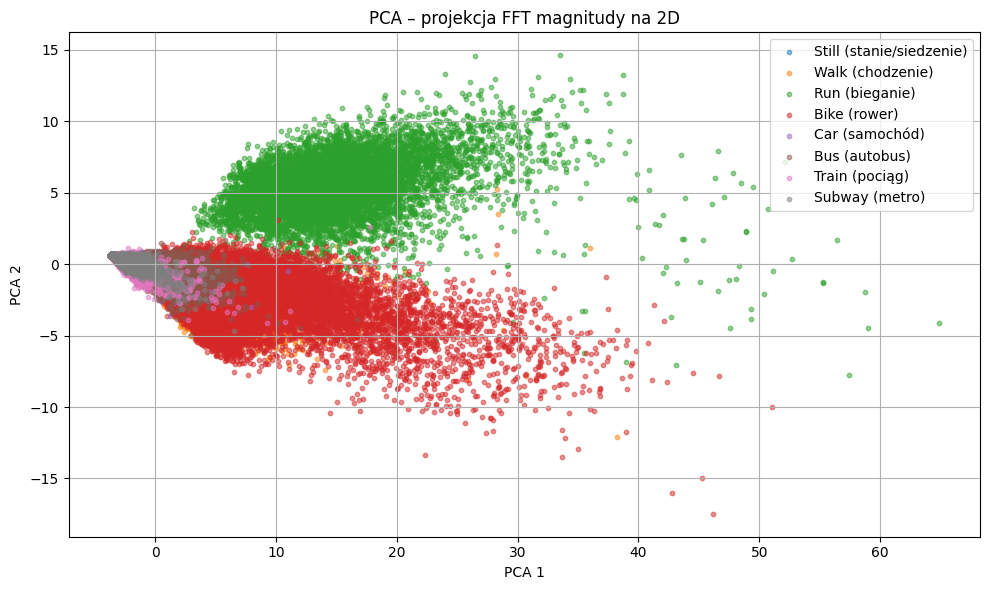

In [ ]:
X_pca, labels_flat = compute_pca_projection(acc_x, acc_y, acc_z, labels)
plot_pca(X_pca, labels_flat)


In [ ]:
print(pca.explained_variance_ratio_)
print(f"Razem zachowana wariancja: {np.sum(pca.explained_variance_ratio_):.2%}")


[0.55268303 0.05944471]
Razem zachowana wariancja: 61.21%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def compute_pca_projection_filtered(acc_x, acc_y, acc_z, labels, exclude_classes=[2, 3, 4], n_fft=50):
    magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
    fft_features = np.abs(np.fft.rfft(magnitude, axis=1))[:, :n_fft]

    labels_flat = labels[:, 250]
    mask = ~np.isin(labels_flat, exclude_classes)

    fft_features_filtered = fft_features[mask]
    labels_filtered = labels_flat[mask]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(fft_features_filtered)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    return X_pca, labels_filtered

def plot_pca_filtered(X_pca, labels_flat):
    activity_names = {
        1: 'Still (stanie/siedzenie)',
        5: 'Car (samochód)',
        6: 'Bus (autobus)',
        7: 'Train (pociąg)',
        8: 'Subway (metro)',
    }

    plt.figure(figsize=(10, 6))
    for class_id in np.unique(labels_flat):
        idxs = labels_flat == class_id
        plt.scatter(X_pca[idxs, 0], X_pca[idxs, 1],
                    label=activity_names.get(class_id, f'Klasa {class_id}'),
                    alpha=0.5, s=10)

    plt.title('PCA – projekcja FFT magnitudy na 2D (bez Walk, Run i Bike)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




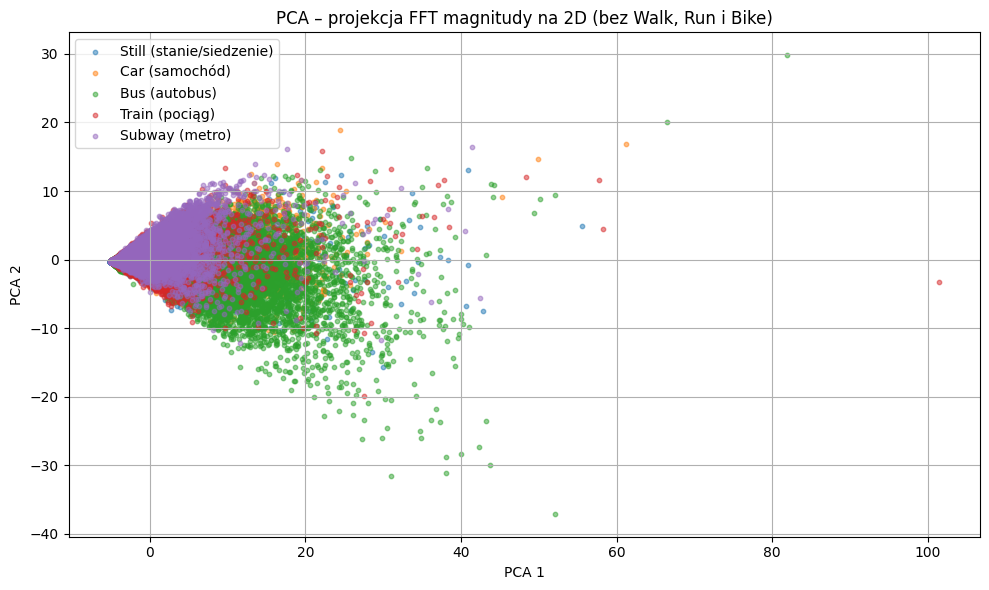

In [ ]:
X_pca_filtered, labels_filtered = compute_pca_projection_filtered(acc_x, acc_y, acc_z, labels)
plot_pca_filtered(X_pca_filtered, labels_filtered)

# ŻYROSKOP

In [4]:
gyr_x = np.loadtxt('/content/drive/MyDrive/Torso/Gyr_x.txt')
gyr_y = np.loadtxt('/content/drive/MyDrive/Torso/Gyr_y.txt')
gyr_z = np.loadtxt('/content/drive/MyDrive/Torso/Gyr_z.txt')

In [25]:
print("Shapes:", gyr_x.shape, gyr_y.shape, gyr_z.shape)

Shapes: (196072, 500) (196072, 500) (196072, 500)


In [6]:
# Połączenie w tensor (N, 3, 500)
gyr = np.stack([gyr_x, gyr_y, gyr_z], axis=1)
print("Shape of gyr:", gyr.shape)

Shape of gyr: (196072, 3, 500)


In [7]:
labels = np.loadtxt('/content/drive/MyDrive/Torso/Label.txt', dtype=int)

In [8]:
labels_flat = labels[:, 250]  # shape: (196072,)

In [9]:
activity_names = {
1: 'Still (stanie/siedzenie)',
2: 'Walk (chodzenie)',
3: 'Run (bieganie)',
4: 'Bike (rower)',
5: 'Car (samochód)',
6: 'Bus (autobus)',
7: 'Train (pociąg)',
8: 'Subway (metro)',
}

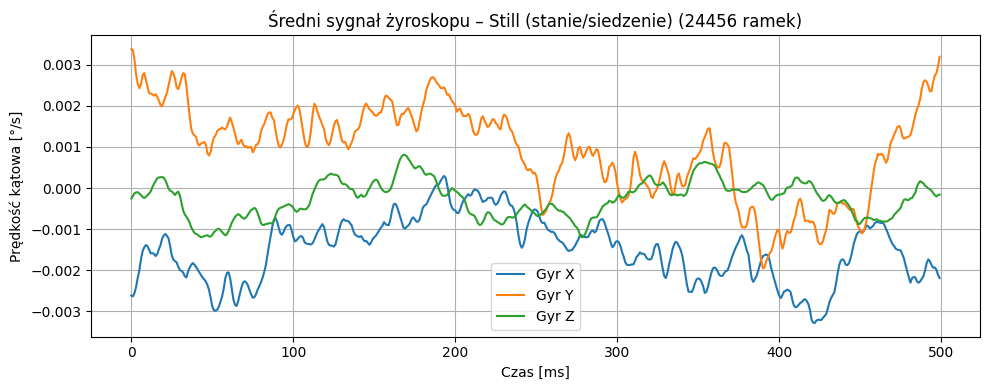

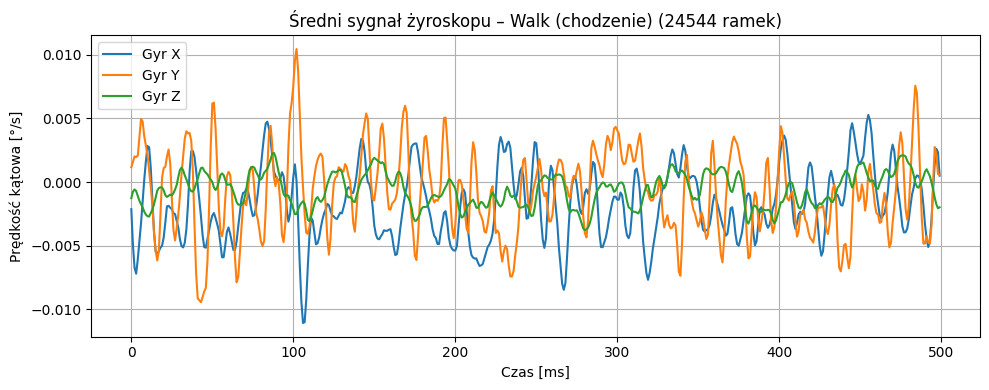

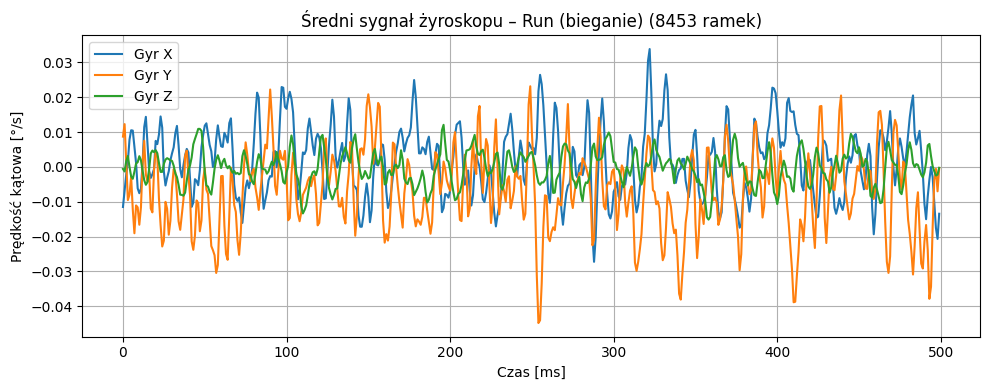

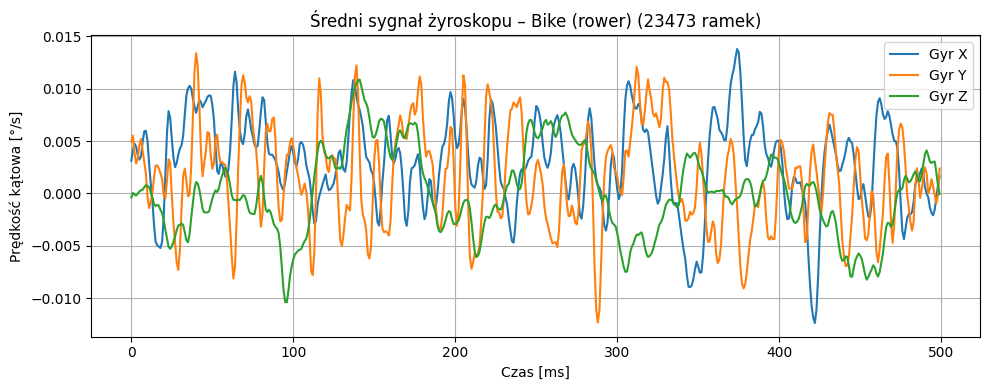

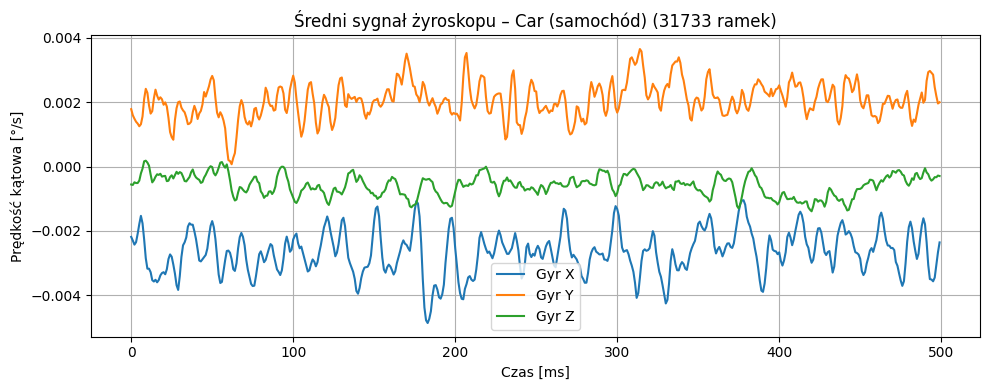

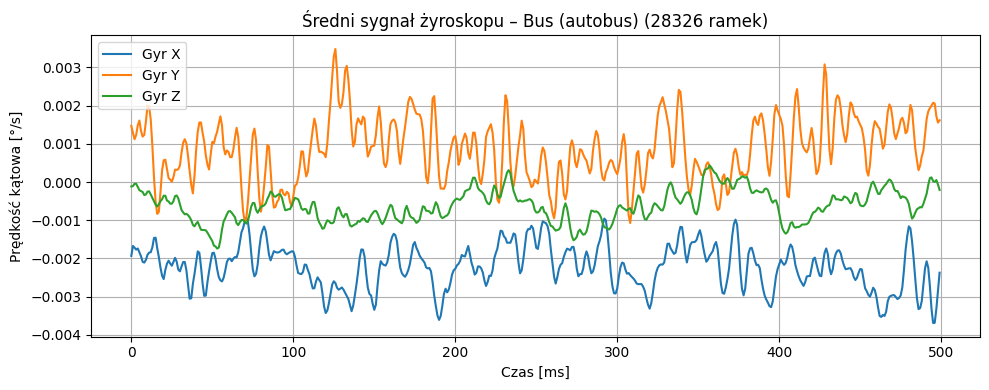

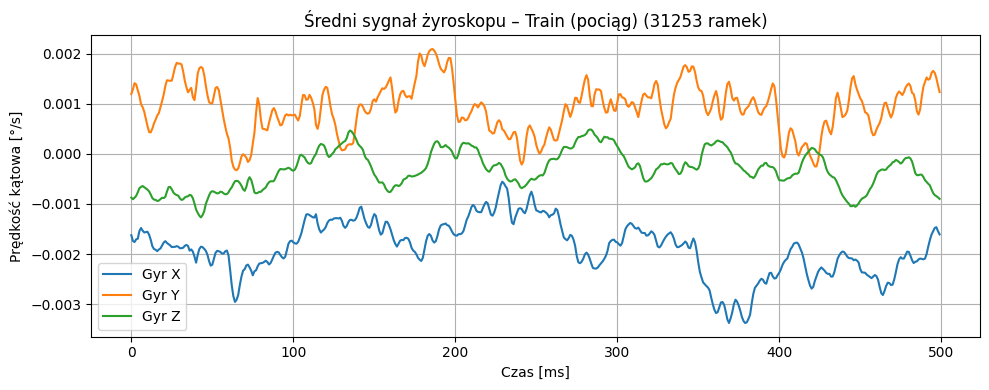

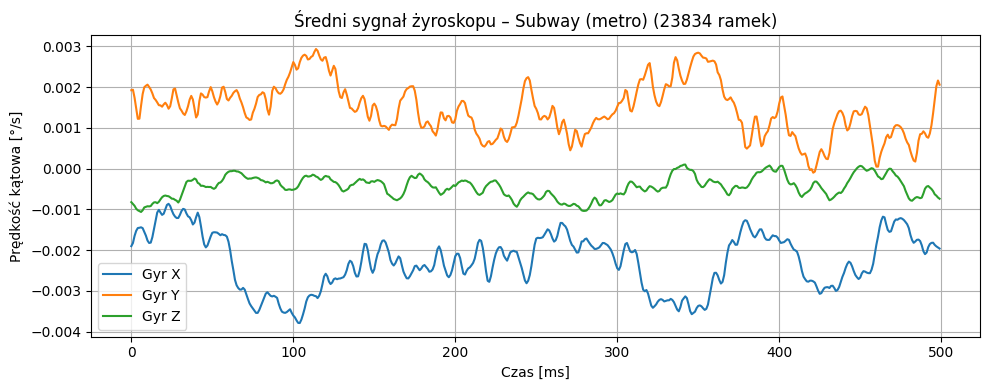

In [11]:
for class_id in sorted(np.unique(labels_flat)):
    idxs = np.where(labels_flat == class_id)[0]
    if len(idxs) == 0:
        continue

    class_data = gyr[idxs]  # shape: (n_samples_class, 3, 500)
    mean_signal = np.mean(class_data, axis=0)  # shape: (3, 500)

    plt.figure(figsize=(10, 4))
    plt.plot(mean_signal[0], label='Gyr X')
    plt.plot(mean_signal[1], label='Gyr Y')
    plt.plot(mean_signal[2], label='Gyr Z')
    plt.title(f'Średni sygnał żyroskopu – {activity_names.get(class_id)} ({len(idxs)} ramek)')
    plt.xlabel('Czas [ms]')
    plt.ylabel('Prędkość kątowa [°/s]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

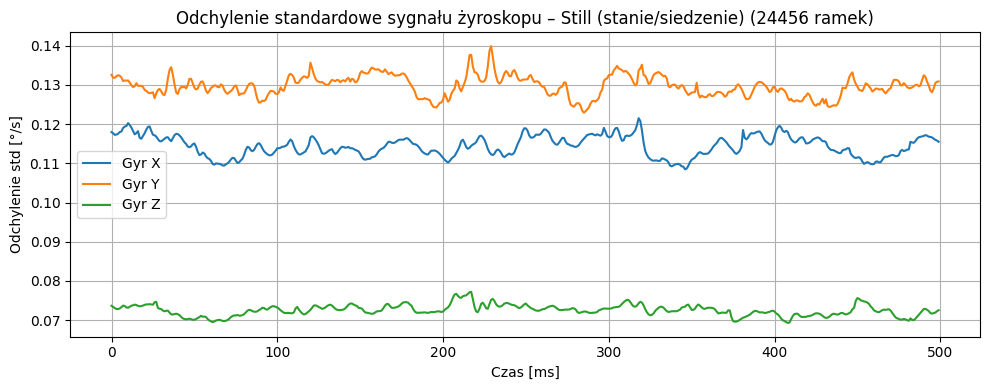

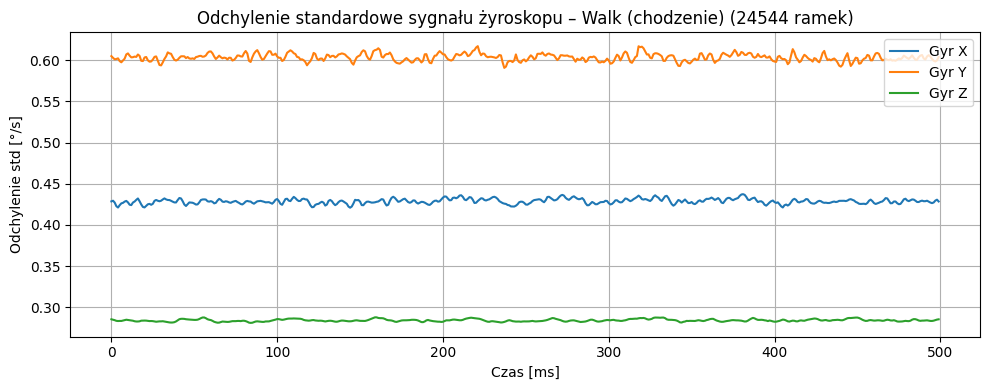

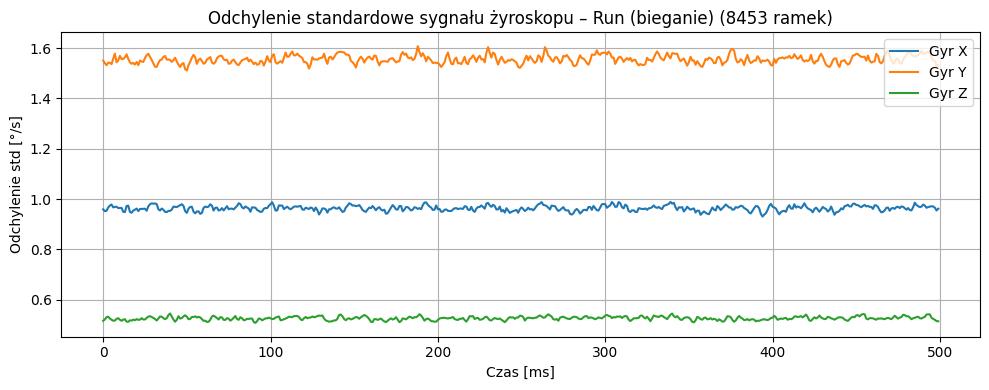

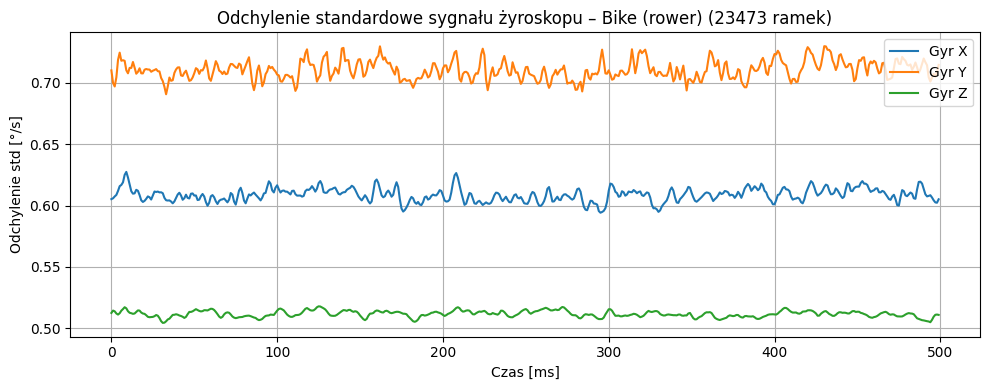

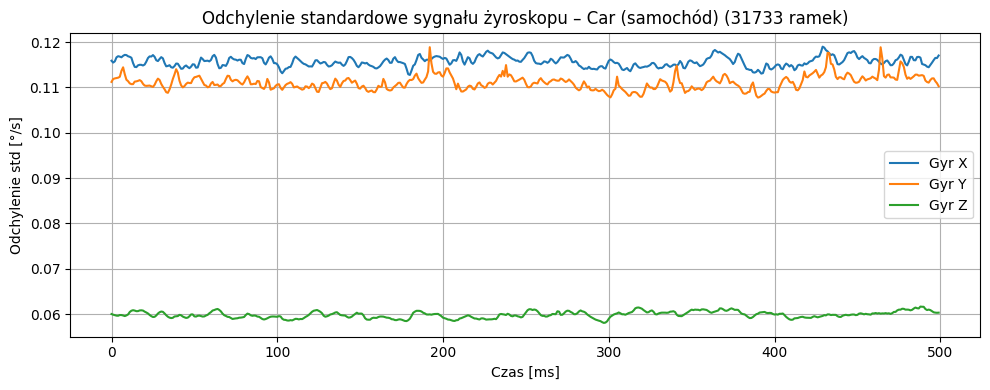

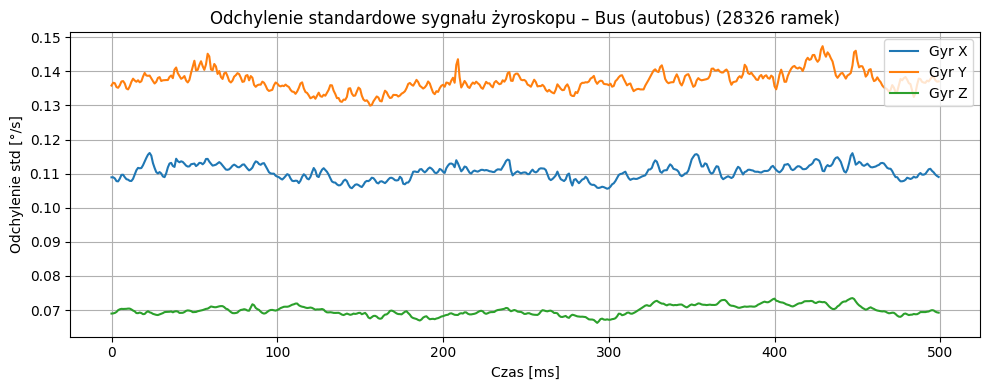

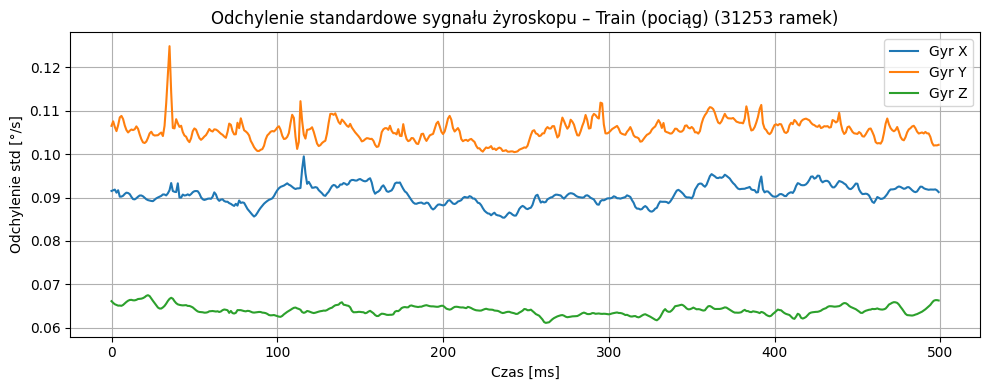

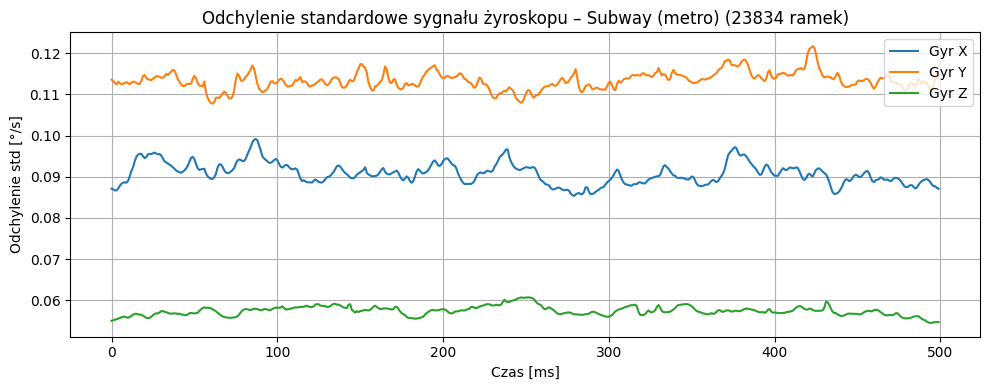

In [12]:
for class_id in sorted(np.unique(labels_flat)):
    idxs = np.where(labels_flat == class_id)[0]
    if len(idxs) == 0:
        continue

    class_data = gyr[idxs]
    std_signal = np.std(class_data, axis=0)

    plt.figure(figsize=(10, 4))
    plt.plot(std_signal[0], label='Gyr X')
    plt.plot(std_signal[1], label='Gyr Y')
    plt.plot(std_signal[2], label='Gyr Z')
    plt.title(f'Odchylenie standardowe sygnału żyroskopu – {activity_names.get(class_id)} ({len(idxs)} ramek)')
    plt.xlabel('Czas [ms]')
    plt.ylabel('Odchylenie std [°/s]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

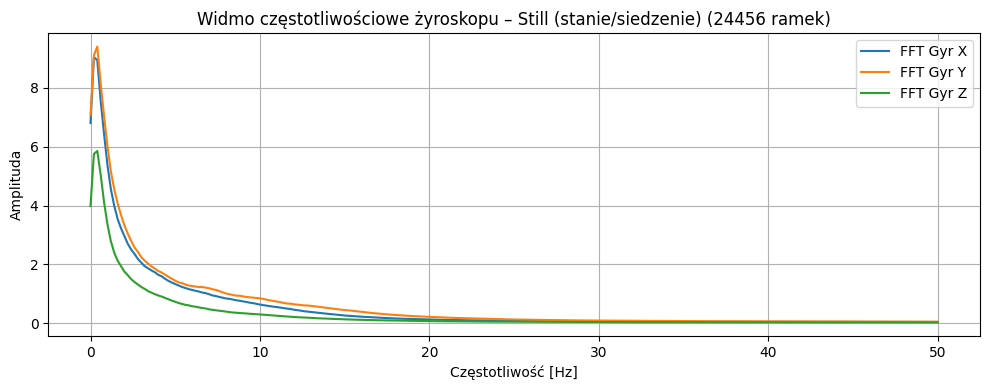

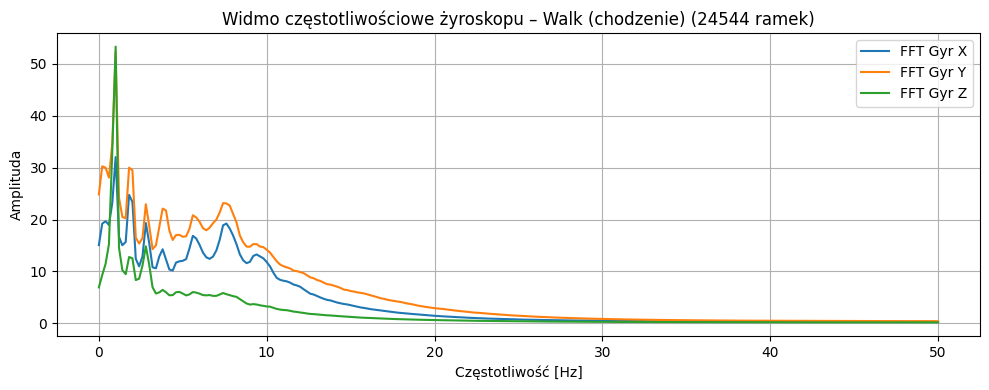

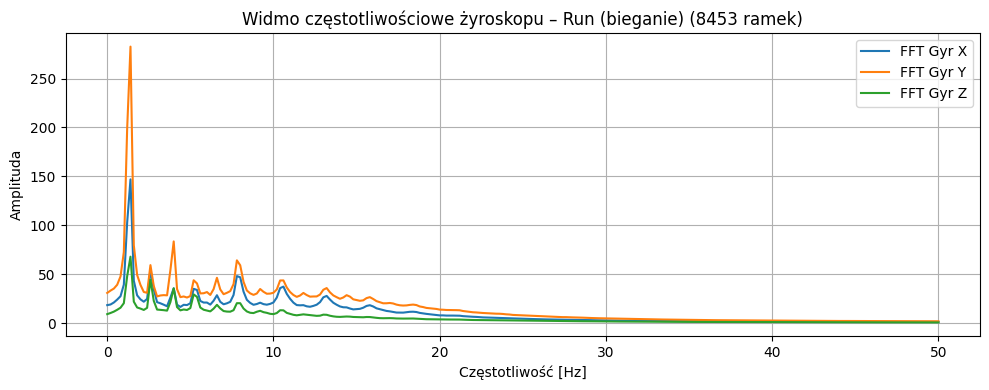

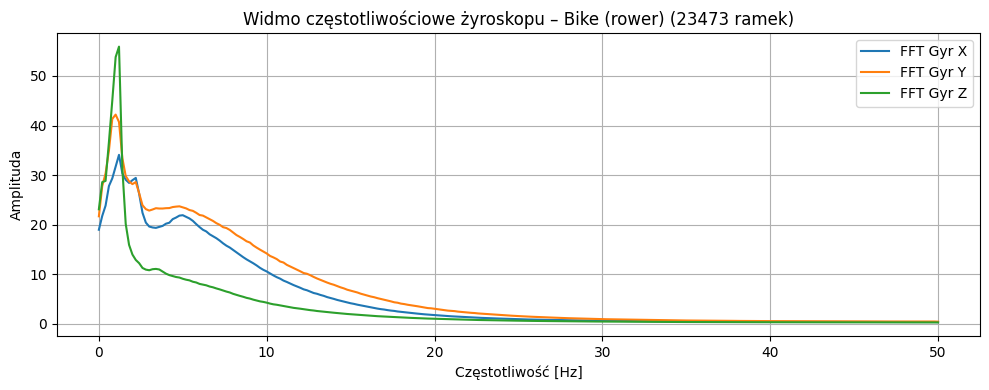

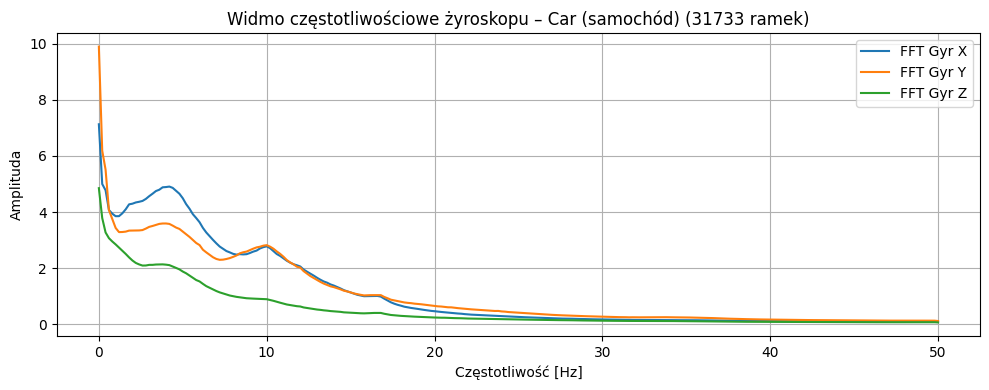

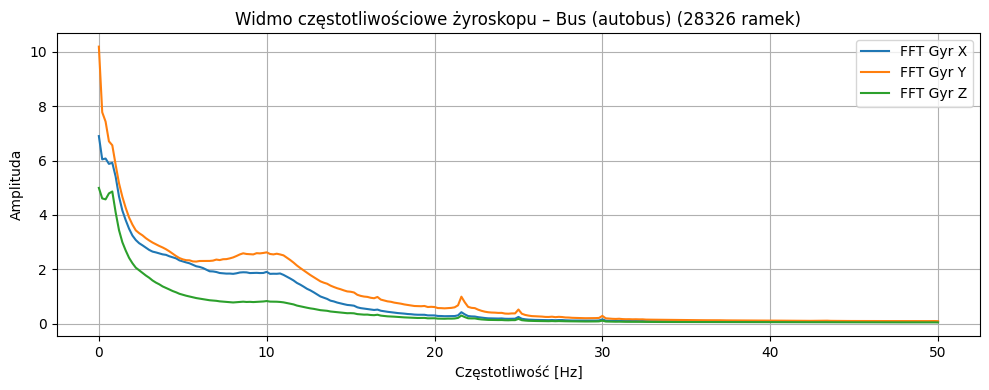

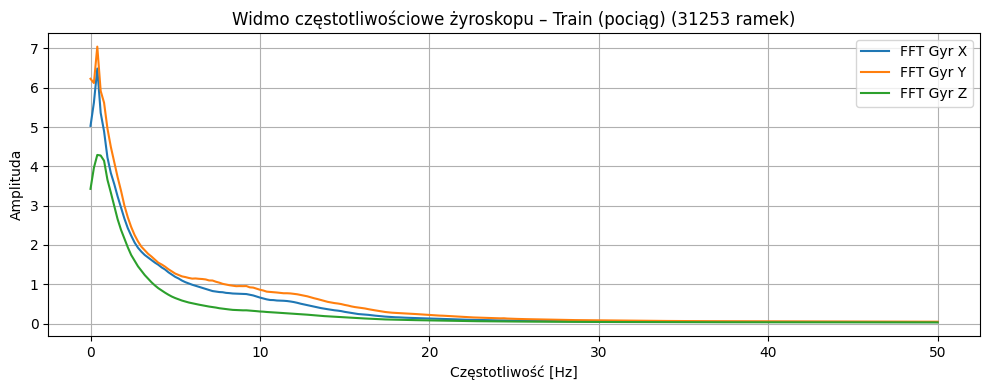

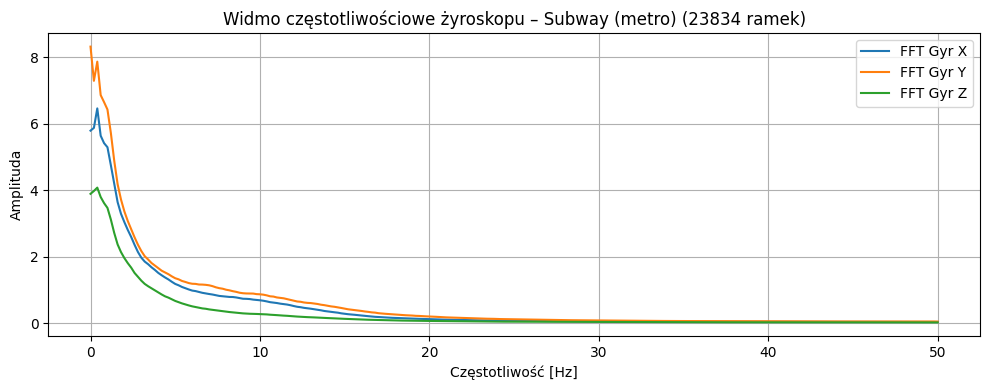

In [15]:
from scipy.fft import rfft, rfftfreq

sampling_rate = 100  # Hz
N = gyr.shape[2]
freqs = rfftfreq(N, d=1/sampling_rate)

for class_id in sorted(np.unique(labels_flat)):
    idxs = np.where(labels_flat == class_id)[0]
    if len(idxs) == 0:
        continue

    class_samples = gyr[idxs]  # shape: (n_samples_class, 3, 500)
    fft_magnitudes = []

    for sample in class_samples:
        axis_ffts = []
        for axis_signal in sample:
            fft_vals = np.abs(rfft(axis_signal))
            axis_ffts.append(fft_vals)
        fft_magnitudes.append(axis_ffts)

    fft_magnitudes = np.array(fft_magnitudes)
    mean_fft = np.mean(fft_magnitudes, axis=0)

    plt.figure(figsize=(10, 4))
    axes = ['X', 'Y', 'Z']
    for i in range(3):
        plt.plot(freqs, mean_fft[i], label=f'FFT Gyr {axes[i]}')

    plt.title(f'Widmo częstotliwościowe żyroskopu – {activity_names.get(class_id)} ({len(idxs)} ramek)')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# MAGNETOMETR

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mag_x = np.loadtxt('/content/drive/MyDrive/Torso/Mag_x.txt')
mag_y = np.loadtxt('/content/drive/MyDrive/Torso/Mag_y.txt')
mag_z = np.loadtxt('/content/drive/MyDrive/Torso/Mag_z.txt')

In [4]:
print("Shapes:", mag_x.shape, mag_y.shape, mag_z.shape)

Shapes: (196072, 500) (196072, 500) (196072, 500)


In [5]:
# Połączenie w tensor (N, 3, 500)
mag = np.stack([mag_x, mag_y, mag_z], axis=1)
print("Shape of mag:", mag.shape)

Shape of mag: (196072, 3, 500)


In [7]:
labels = np.loadtxt('/content/drive/MyDrive/Torso/Label.txt', dtype=int)

In [8]:
labels_flat = labels[:, 250]  # shape: (196072,)

In [12]:
activity_names = {
1: 'Still (stanie/siedzenie)',
2: 'Walk (chodzenie)',
3: 'Run (bieganie)',
4: 'Bike (rower)',
5: 'Car (samochód)',
6: 'Bus (autobus)',
7: 'Train (pociąg)',
8: 'Subway (metro)',
}

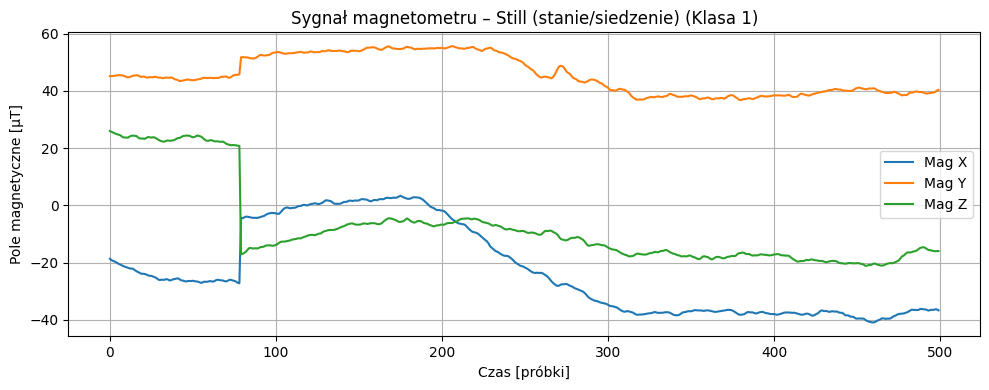

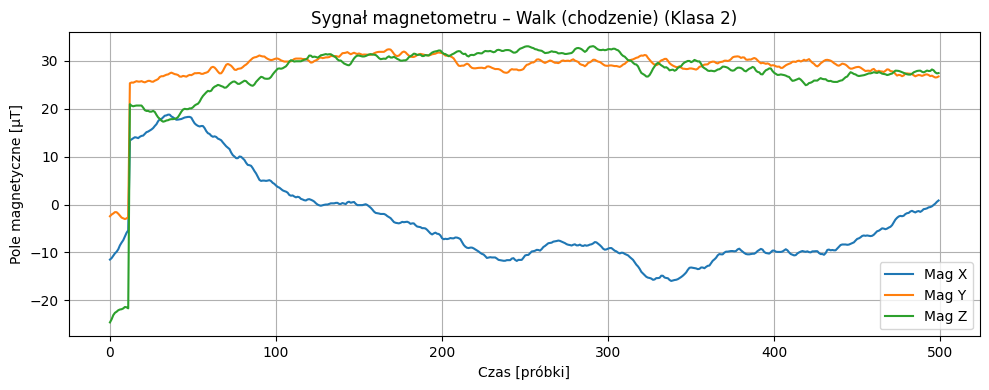

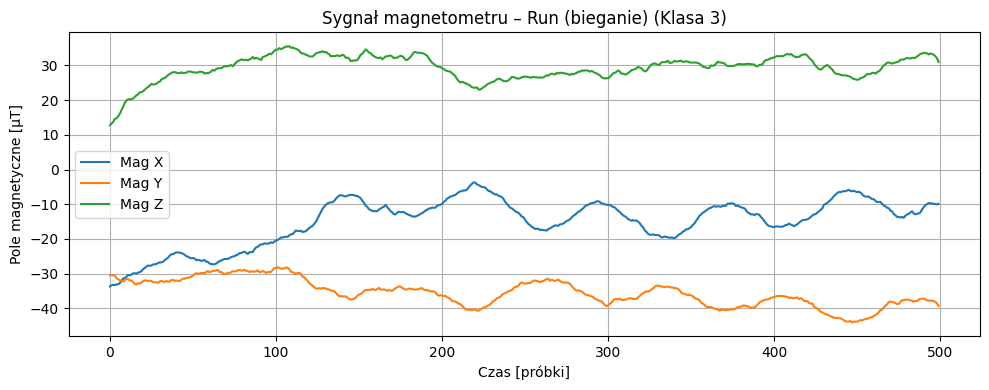

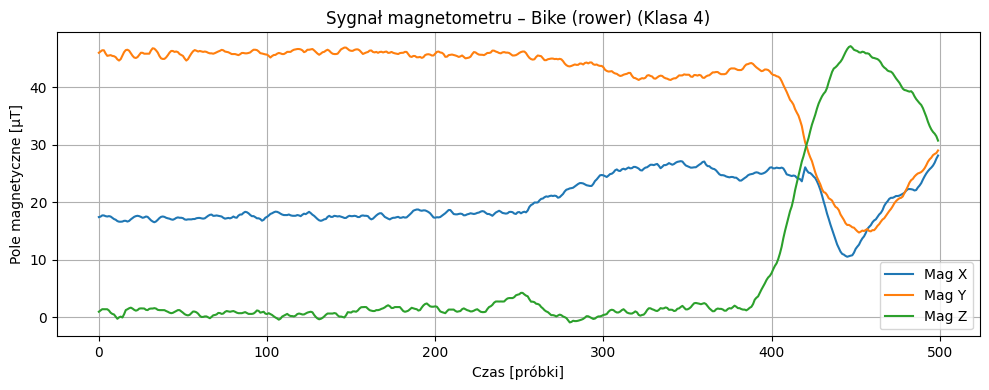

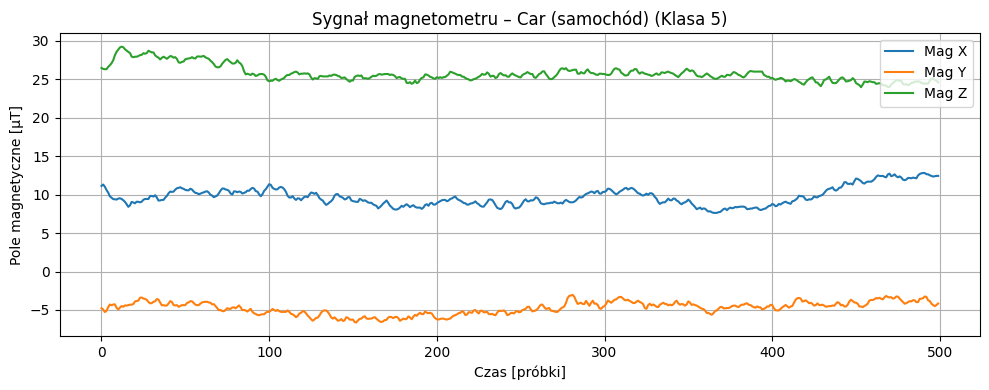

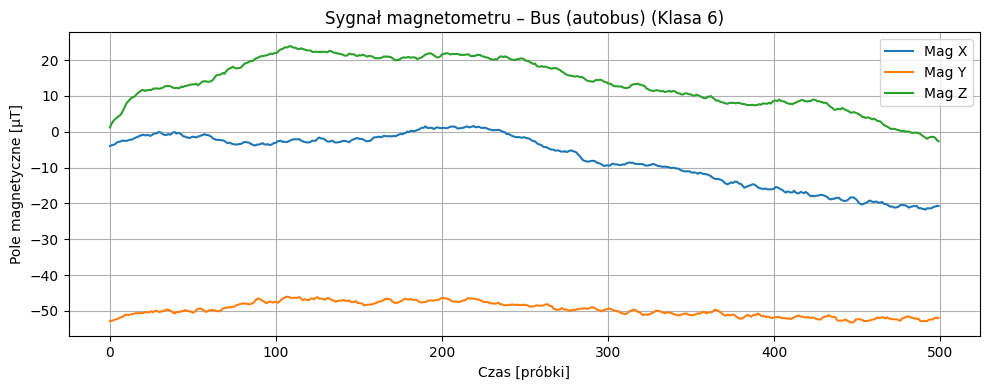

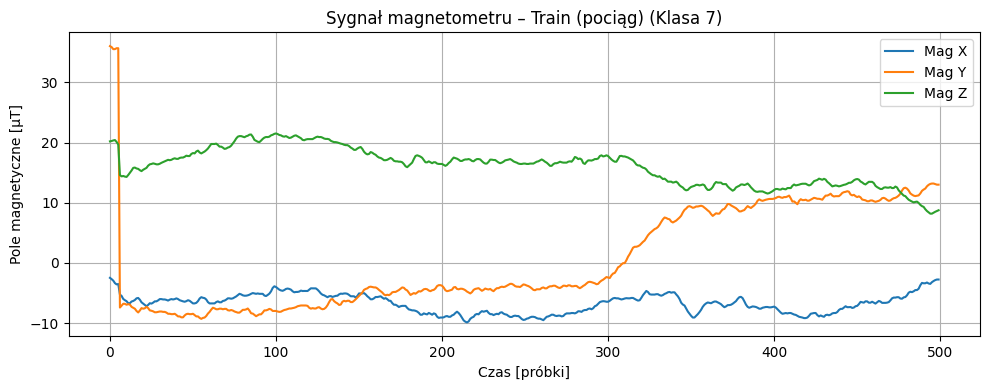

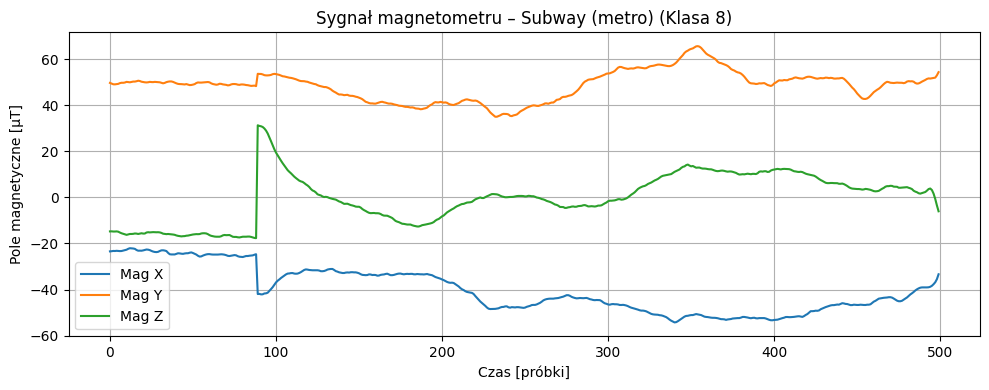

In [13]:
# Wyświetlenie przykładowego przebiegu dla każdej klasy
unique_labels = np.unique(labels_flat)

for class_label in sorted(unique_labels):
    idxs = np.where(labels_flat == class_label)[0]
    if len(idxs) == 0:
        continue

    idx = idxs[0]  # pierwsza próbka z danej klasy
    sample = mag[idx]

    plt.figure(figsize=(10, 4))
    plt.plot(sample[0], label='Mag X')
    plt.plot(sample[1], label='Mag Y')
    plt.plot(sample[2], label='Mag Z')
    plt.title(f'Sygnał magnetometru – {activity_names.get(class_label)} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Pole magnetyczne [µT]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

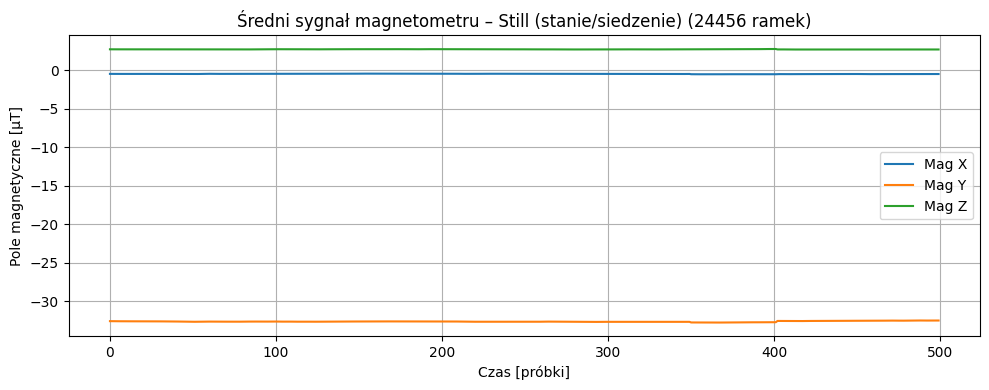

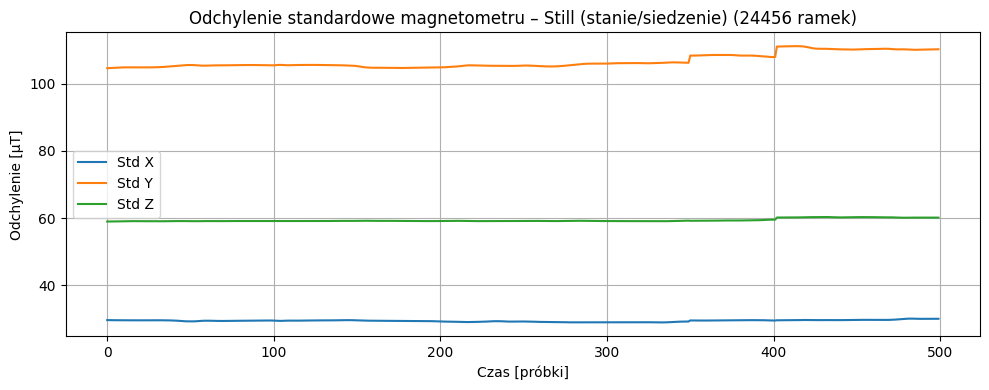

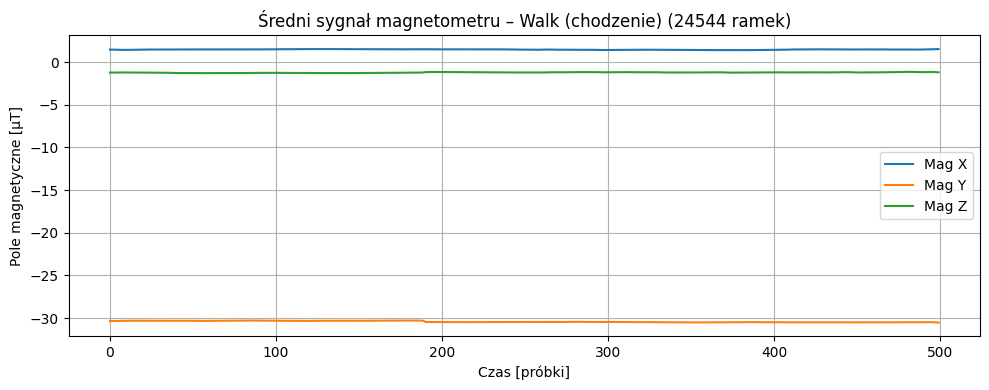

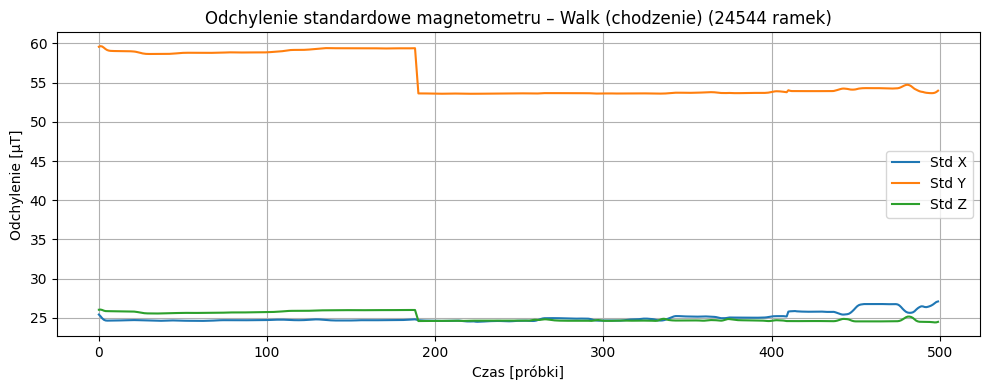

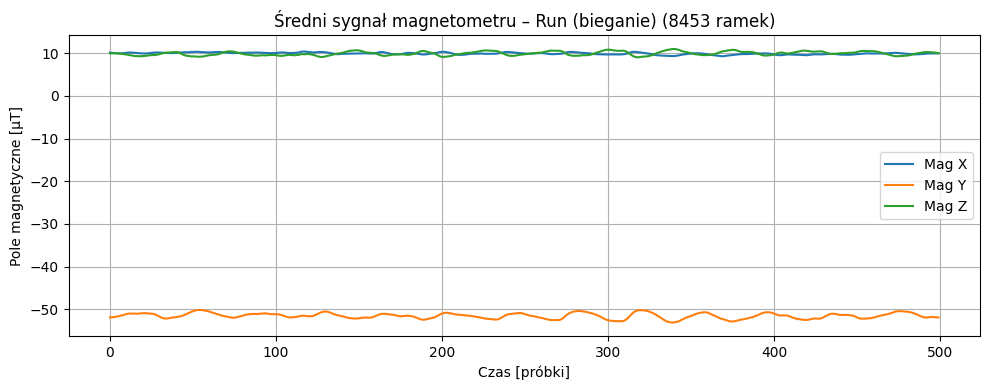

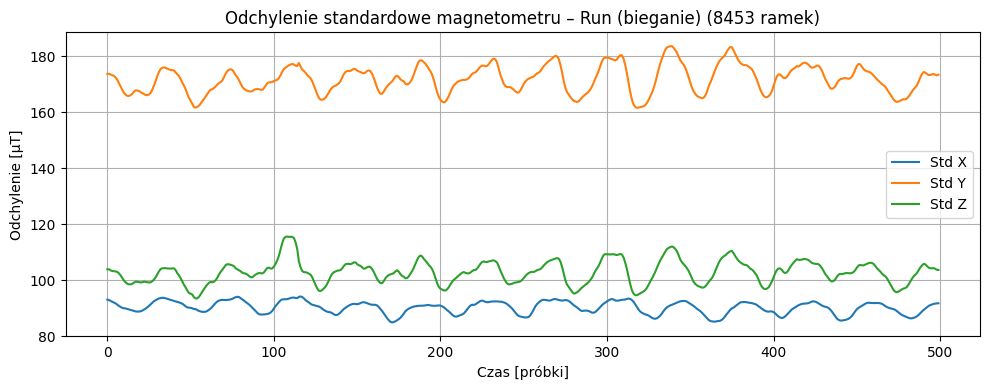

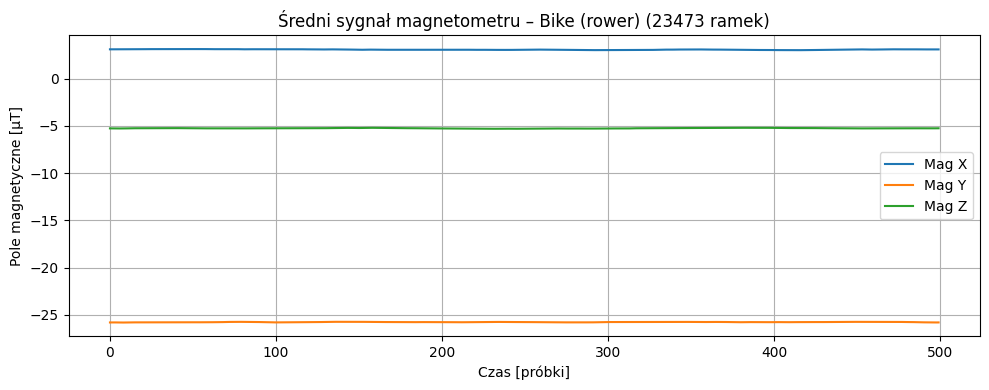

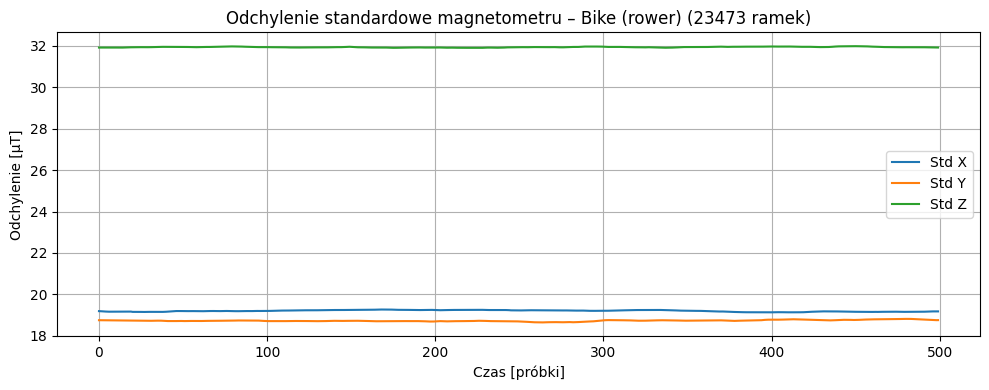

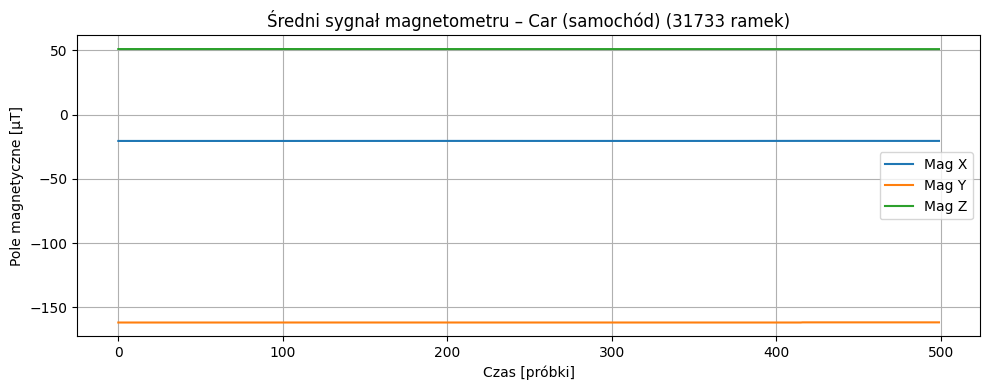

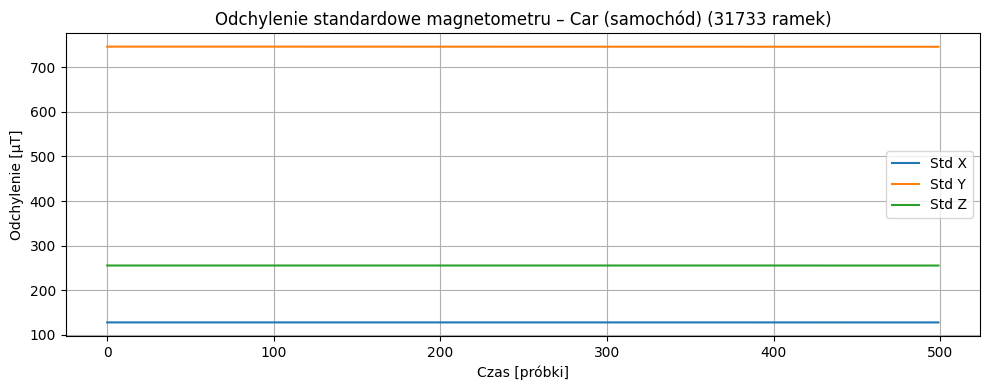

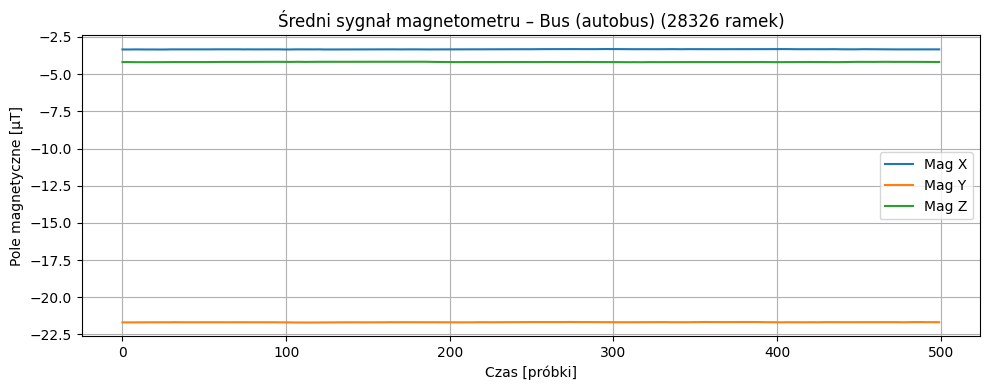

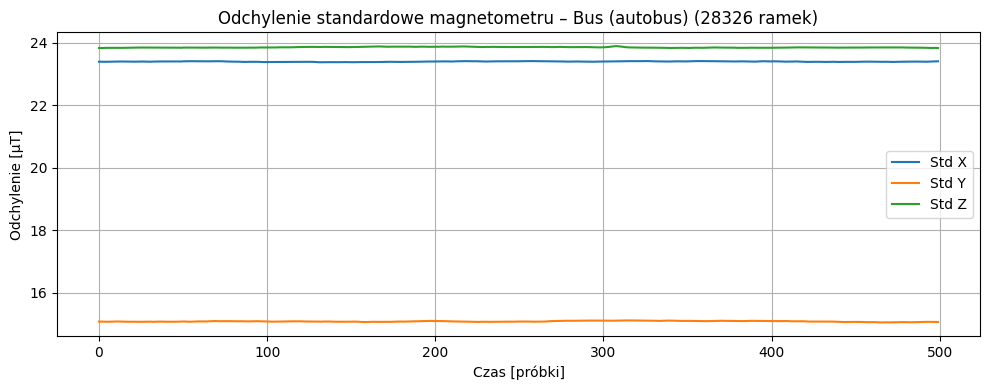

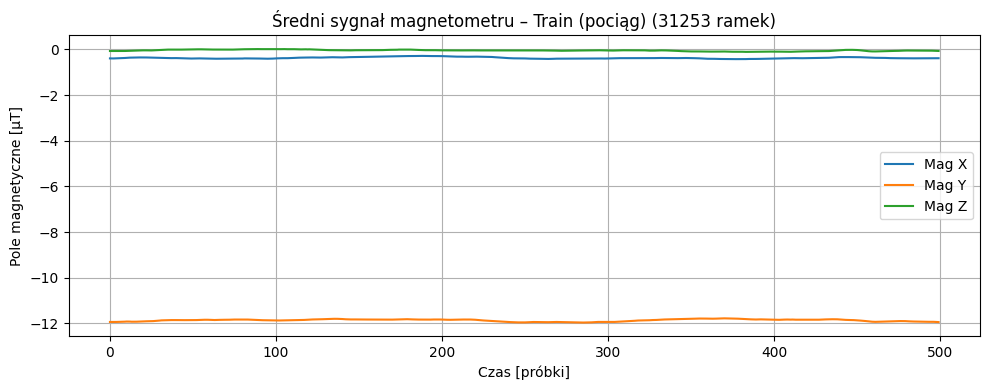

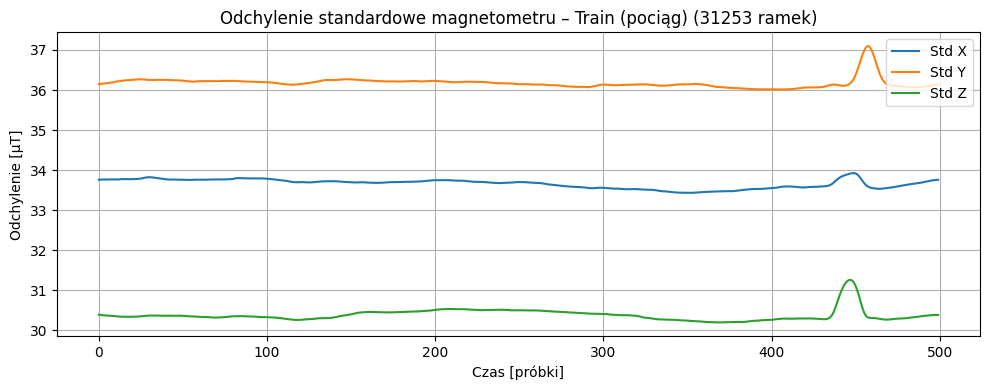

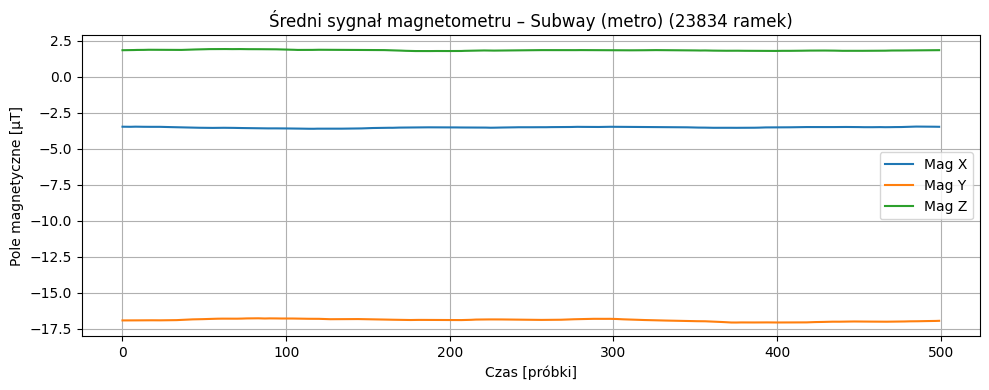

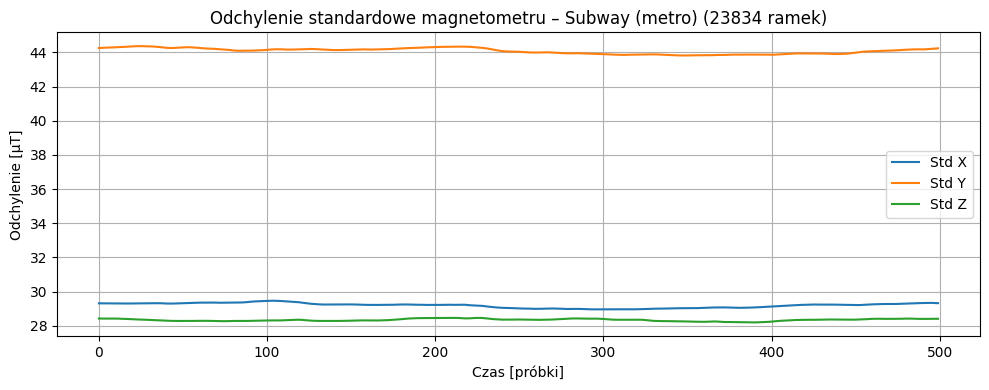

In [15]:
for class_id in sorted(np.unique(labels_flat)):
    idxs = np.where(labels_flat == class_id)[0]
    if len(idxs) == 0:
        continue

    class_samples = mag[idxs]  # shape: (n_samples_class, 3, 500)
    mean_signal = np.mean(class_samples, axis=0)  # shape: (3, 500)
    std_signal = np.std(class_samples, axis=0)    # shape: (3, 500)

    plt.figure(figsize=(10, 4))
    plt.plot(mean_signal[0], label='Mag X')
    plt.plot(mean_signal[1], label='Mag Y')
    plt.plot(mean_signal[2], label='Mag Z')
    plt.title(f'Średni sygnał magnetometru – {activity_names.get(class_id)} ({len(idxs)} ramek)')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Pole magnetyczne [μT]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(std_signal[0], label='Std X')
    plt.plot(std_signal[1], label='Std Y')
    plt.plot(std_signal[2], label='Std Z')
    plt.title(f'Odchylenie standardowe magnetometru – {activity_names.get(class_id)} ({len(idxs)} ramek)')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Odchylenie [μT]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

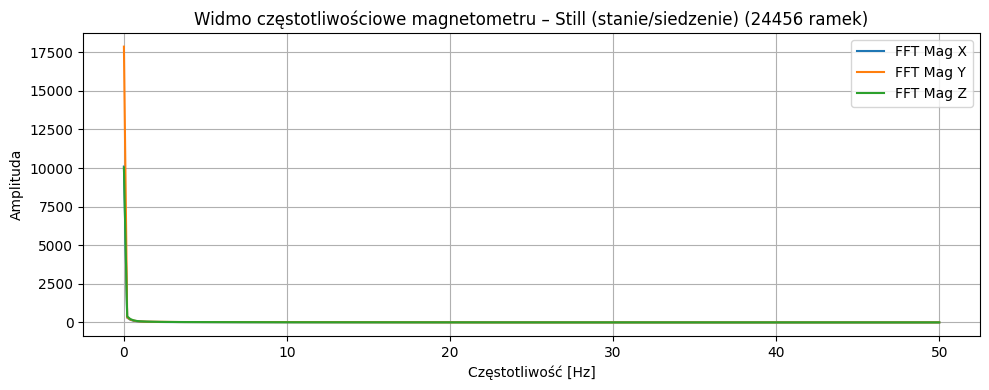

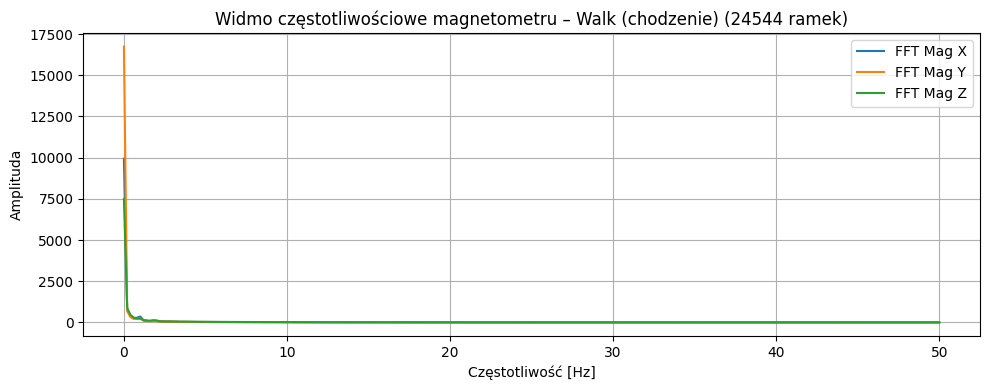

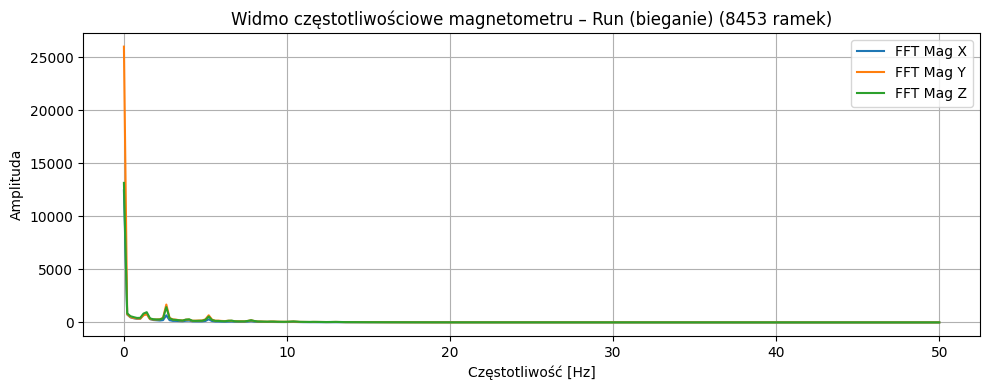

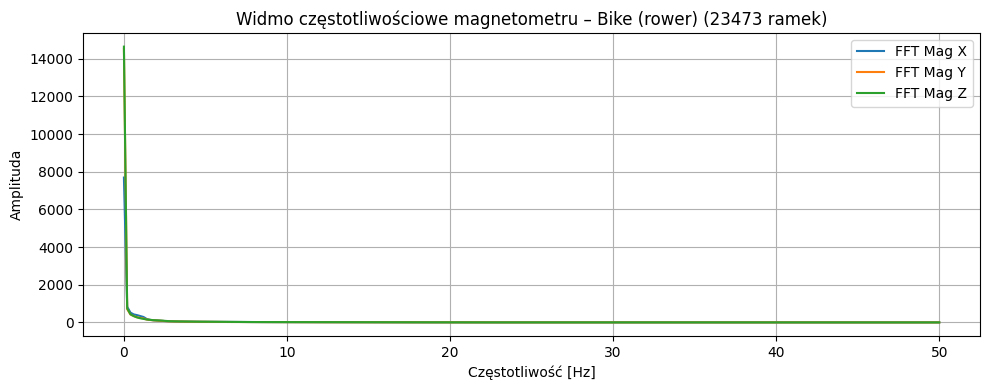

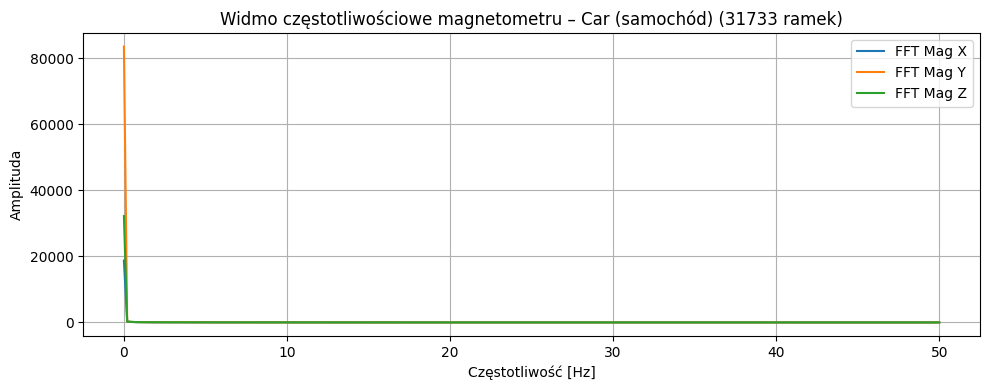

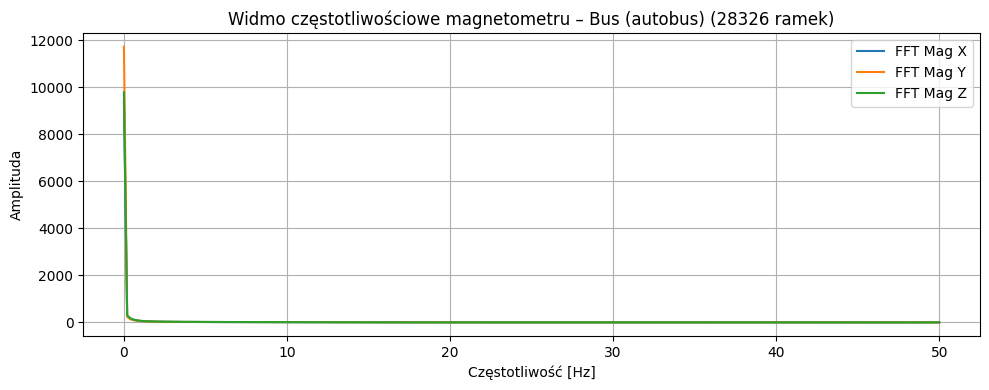

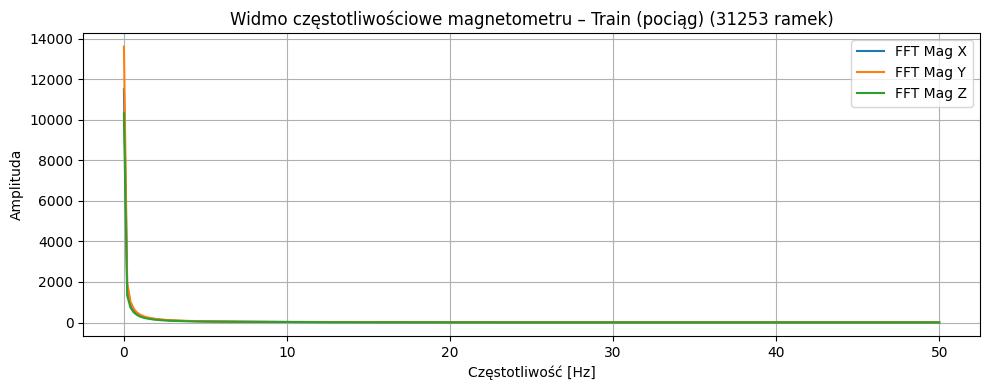

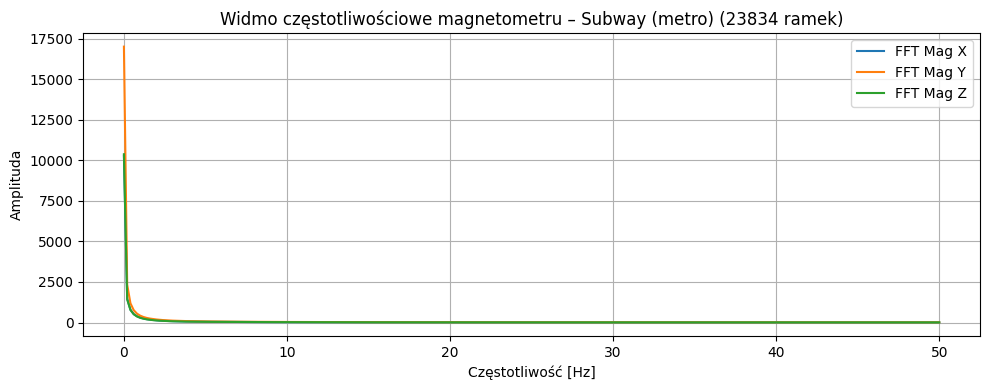

In [16]:
from scipy.fft import rfft, rfftfreq

sampling_rate = 100  # Hz
N = mag.shape[2]     # liczba próbek czasowych (czyli 500)
freqs = rfftfreq(N, d=1/sampling_rate)


for class_id in sorted(np.unique(labels_flat)):
    idxs = np.where(labels_flat == class_id)[0]
    if len(idxs) == 0:
        continue

    class_samples = mag[idxs]  # shape: (n_samples_class, 3, 500)
    fft_magnitudes = []

    for sample in class_samples:
        axis_ffts = []
        for axis_signal in sample:  # 3 razy (X, Y, Z)
            fft_vals = np.abs(rfft(axis_signal))
            axis_ffts.append(fft_vals)
        fft_magnitudes.append(axis_ffts)

    fft_magnitudes = np.array(fft_magnitudes)  # shape: (n_samples, 3, freq_bins)
    mean_fft = np.mean(fft_magnitudes, axis=0)  # shape: (3, freq_bins)

    plt.figure(figsize=(10, 4))
    axes = ['X', 'Y', 'Z']
    for i in range(3):
        plt.plot(freqs, mean_fft[i], label=f'FFT Mag {axes[i]}')

    plt.title(f'Widmo częstotliwościowe magnetometru – {activity_names.get(class_id)} ({len(idxs)} ramek)')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


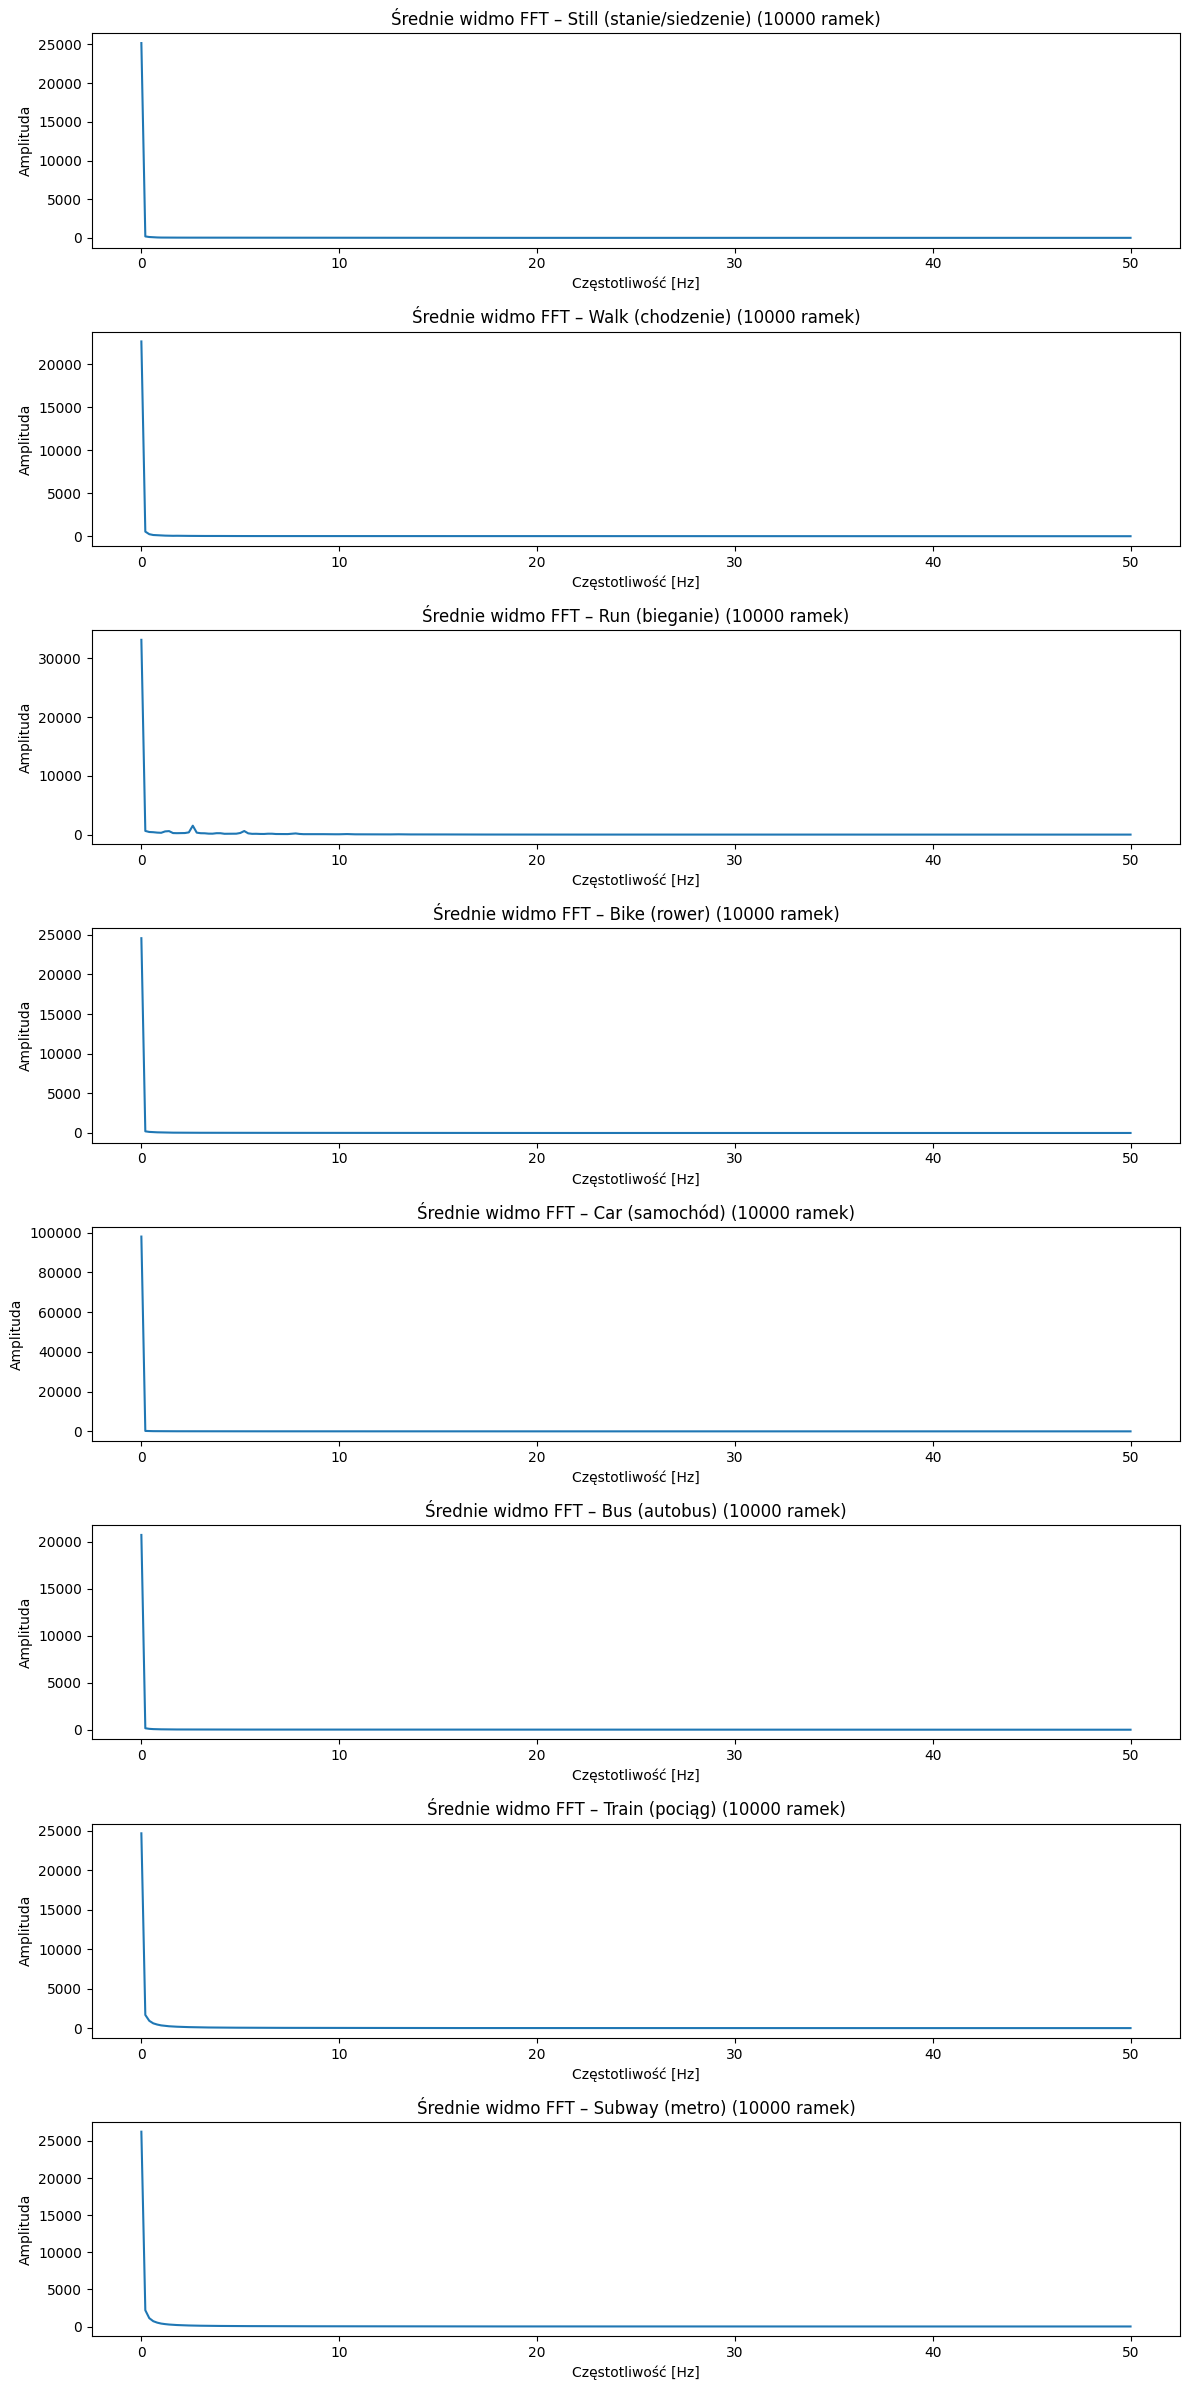

In [17]:
import numpy as np
import matplotlib.pyplot as plt

mag_magnitude = np.sqrt(mag[:, 0, :]**2 + mag[:, 1, :]**2 + mag[:, 2, :]**2)

#Parametry FFT
sampling_rate = 100  # Hz
n_samples = mag_magnitude.shape[1]
freqs = np.fft.rfftfreq(n_samples, d=1 / sampling_rate)


plt.figure(figsize=(12, 24))
for i, class_id in enumerate(activity_names.keys(), 1):
    all_idxs = np.where(labels == class_id)[0]

    # ograniczenie do maks. 10000 ramek
    if len(all_idxs) > 10000:
        idxs = np.random.choice(all_idxs, size=10000, replace=False)
    else:
        idxs = all_idxs

    #FFT każdej ramki (wektorowo)
    fft_values = np.abs(np.fft.rfft(mag_magnitude[idxs], axis=1))  # shape: (n, freq)
    mean_fft = np.mean(fft_values, axis=0)

    plt.subplot(8, 1, i)
    plt.plot(freqs, mean_fft)
    plt.title(f'Średnie widmo FFT – {activity_names[class_id]} ({len(idxs)} ramek)')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()


# podsumowanie

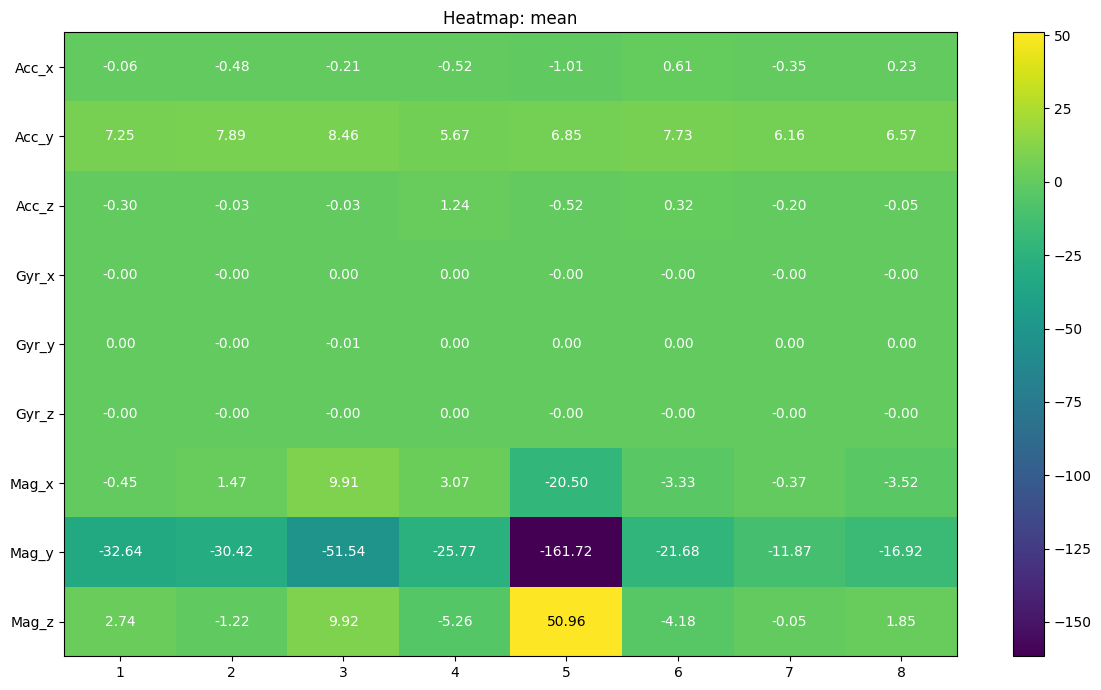

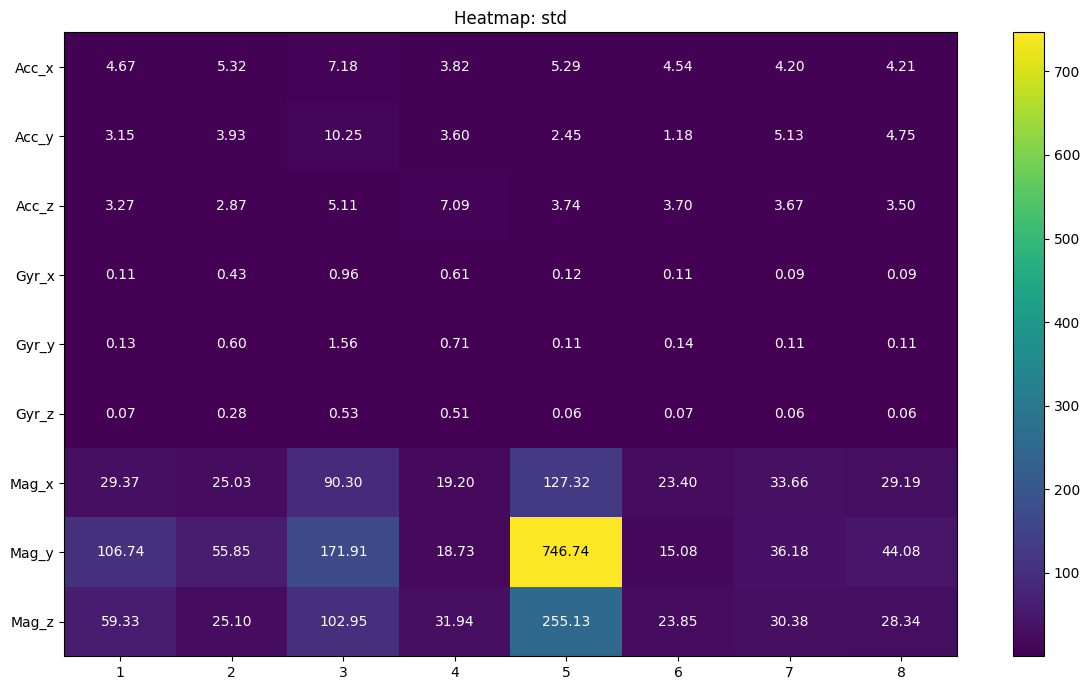

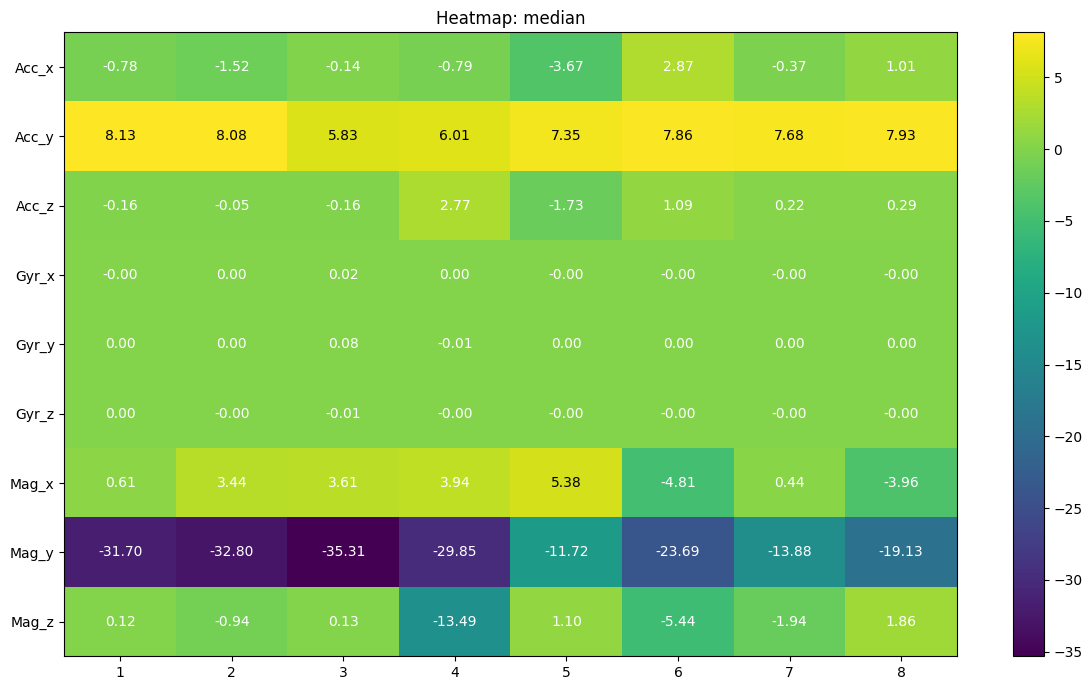

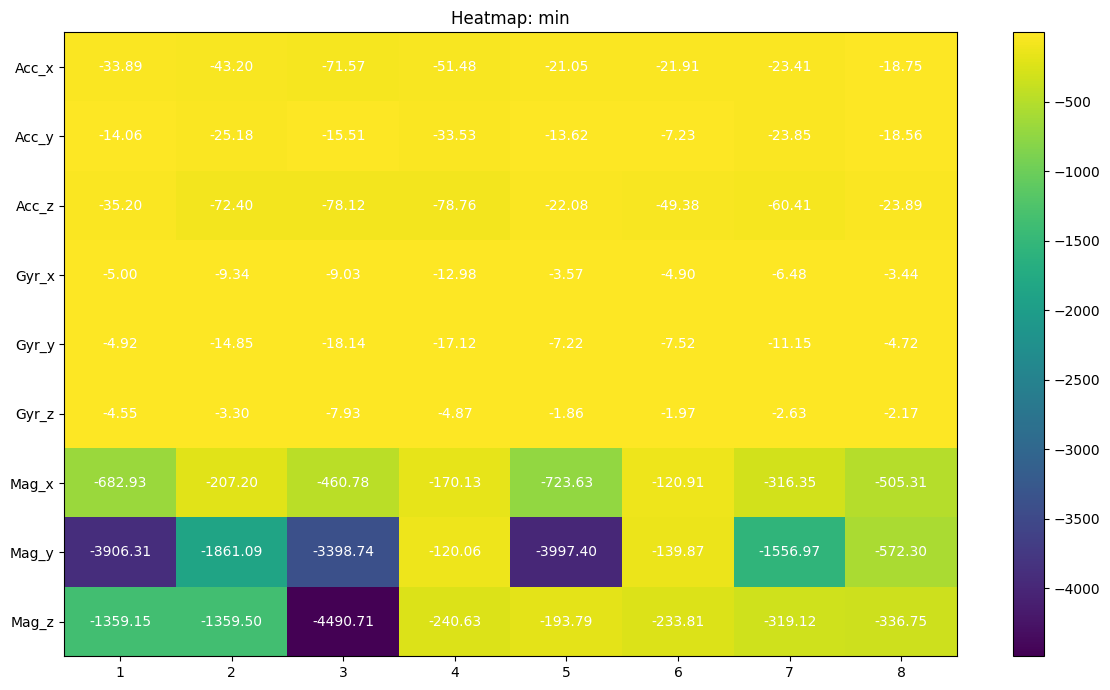

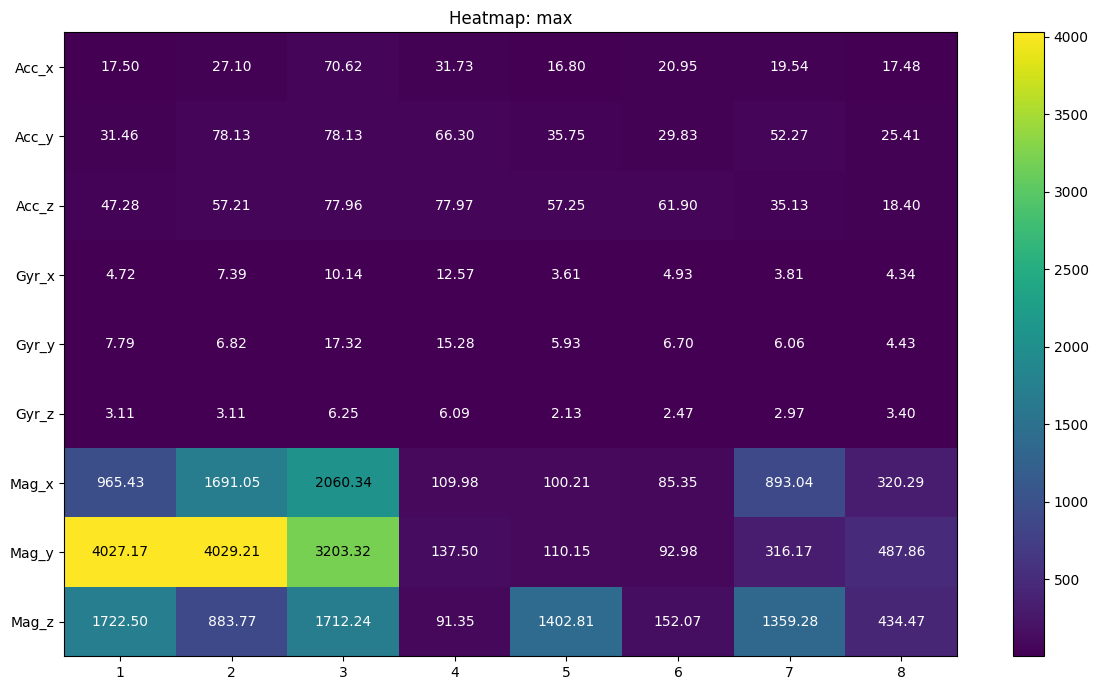

In [5]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def group_by_label(sensor_dict, labels_flat):
    grouped = {}
    for name, data in sensor_dict.items():
        df = pd.DataFrame(data)
        df['label'] = labels_flat
        grouped[name] = {lbl: grp.drop(columns='label').reset_index(drop=True)
                         for lbl, grp in df.groupby('label')}
    return grouped

sensor_dict = {
    'Acc_x': acc_x,
    'Acc_y': acc_y,
    'Acc_z': acc_z,
    'Gyr_x': gyr_x,
    'Gyr_y': gyr_y,
    'Gyr_z': gyr_z,
    'Mag_x': mag_x,
    'Mag_y': mag_y,
    'Mag_z': mag_z,
}

grouped_data = group_by_label(sensor_dict, labels_flat)

# Obliczenie statystyk
stats_rows = []
for name, label_data in grouped_data.items():
    for label, df in label_data.items():
        vals = df.values.flatten()
        stats_rows.append({
            'sensor': name,
            'label': label,
            'mean': vals.mean(),
            'std': vals.std(),
            'median': np.median(vals),
            'min': vals.min(),
            'max': vals.max()
        })

stats_df = pd.DataFrame(stats_rows)

# Funkcja do rysowania heatmap
def plot_stat_heatmap(df, stat):
    pivot = df.pivot(index='sensor', columns='label', values=stat)
    plt.figure(figsize=(12, 7))
    im = plt.imshow(pivot, aspect='auto', cmap='viridis')
    plt.colorbar(im)
    plt.xticks(ticks=np.arange(pivot.shape[1]), labels=pivot.columns)
    plt.yticks(ticks=np.arange(pivot.shape[0]), labels=pivot.index)
    plt.title(f'Heatmap: {stat}')
    for i in range(pivot.shape[0]):
        for j in range(pivot.shape[1]):
            val = pivot.iloc[i, j]
            plt.text(j, i, f'{val:.2f}', ha='center', va='center',
                     color='white' if val < pivot.values.max() / 2 else 'black')
    plt.tight_layout()
    plt.show()

# Rysuj wszystkie statystyki
for stat in ['mean', 'std', 'median', 'min', 'max']:
    plot_stat_heatmap(stats_df, stat)
